In [334]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from tqdm.auto import tqdm

In [335]:
attacking=pd.read_csv("C:/MS @ IU/Data Visualization/Project/Dataset/attacking.csv")
attempts=pd.read_csv("C:/MS @ IU/Data Visualization/Project/Dataset/attempts.csv")
defending=pd.read_csv("C:/MS @ IU/Data Visualization/Project/Dataset/defending.csv")
disciplne=pd.read_csv("C:/MS @ IU/Data Visualization/Project/Dataset/disciplinary.csv")
distribution=pd.read_csv("C:/MS @ IU/Data Visualization/Project/Dataset/distributon.csv")
goalkeeping=pd.read_csv("C:/MS @ IU/Data Visualization/Project/Dataset/goalkeeping.csv")
goals=pd.read_csv("C:/MS @ IU/Data Visualization/Project/Dataset/goals.csv")
keystats=pd.read_csv("C:/MS @ IU/Data Visualization/Project/Dataset/key_stats.csv")

In [336]:
# Checking for null values

df_list=[attacking,attempts,defending,disciplne,distribution,goalkeeping,goals,keystats]

for dfs in df_list:
    #print("For ",dfs)
    print(dfs.isna().sum())

serial          0
player_name     0
club            0
position        0
assists         0
corner_taken    0
offsides        0
dribbles        0
match_played    0
dtype: int64
serial            0
player_name       0
club              0
position          0
total_attempts    0
on_target         0
off_target        0
blocked           0
match_played      0
dtype: int64
serial                 0
player_name            0
club                   0
position               0
balls_recoverd         0
tackles                0
t_won                  0
t_lost                 0
clearance_attempted    0
match_played           0
dtype: int64
serial             0
player_name        0
club               0
position           0
fouls_committed    0
fouls_suffered     0
red                0
yellow             0
minutes_played     0
match_played       0
dtype: int64
serial             0
player_name        0
club               0
position           0
pass_accuracy      0
pass_attempted     0
pass_completed     0

In [337]:
attacking.head()

#df_assists_top10

,serial,player_name,club,position,assists,corner_taken,offsides,dribbles,match_played
0,1,Bruno Fernandes,Man. United,Midfielder,7,10,2,7,7
1,2,Vinícius Júnior,Real Madrid,Forward,6,3,4,83,13
2,2,Sané,Bayern,Midfielder,6,3,3,32,10
3,4,Antony,Ajax,Forward,5,3,4,28,7
4,5,Alexander-Arnold,Liverpool,Defender,4,36,0,9,9


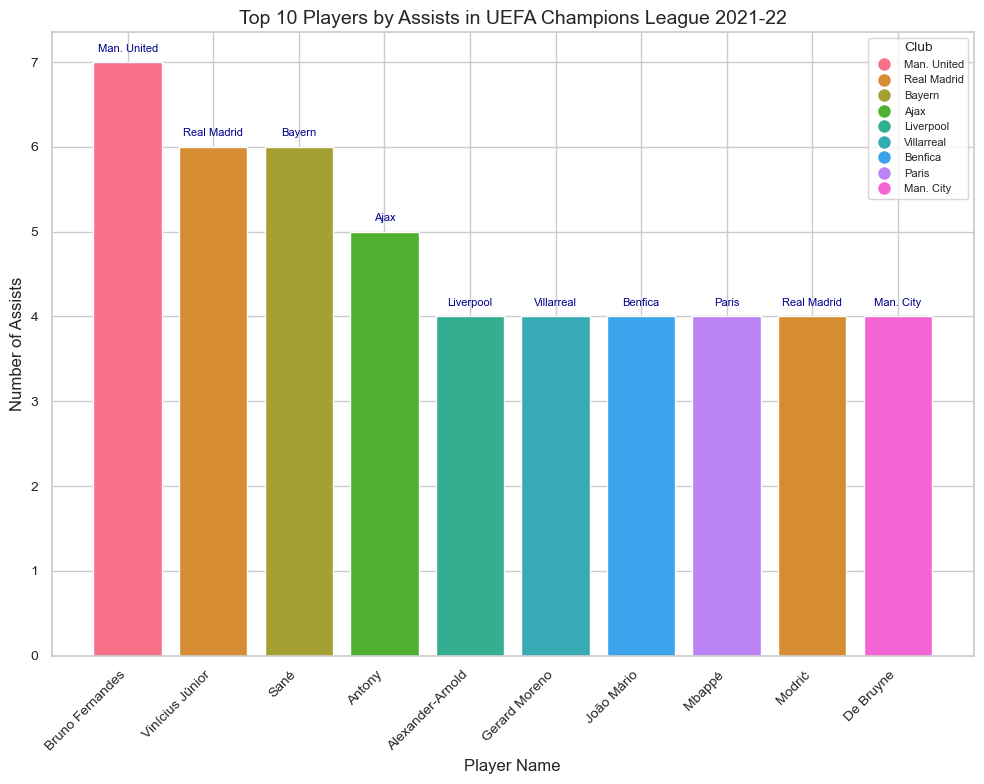

In [338]:
import matplotlib.pyplot as plt
import seaborn as sns

df_assists = attacking[['player_name', 'club', 'assists']].dropna()

# Sum assists for each player across all matches
df_assists = df_assists.groupby(['player_name', 'club'])['assists'].sum().reset_index()

# Sort by total assists in descending order and select the top 10
df_assists_top10 = df_assists.sort_values(by='assists', ascending=False).head(10)

# Create a unique color for each club using a colormap
colors = sns.color_palette("husl", n_colors=len(df_assists_top10['club'].unique()))

# Map each club to a color
club_color_mapping = dict(zip(df_assists_top10['club'].unique(), colors))
df_assists_top10['color'] = df_assists_top10['club'].map(club_color_mapping)

# Create a bar plot with colors based on the club
plt.figure(figsize=(10, 8))
bars = plt.bar(df_assists_top10['player_name'], df_assists_top10['assists'], color=df_assists_top10['color'])

# Add club information to the plot
for bar, value, club in zip(bars, df_assists_top10['assists'], df_assists_top10['club']):
    plt.text(bar.get_x() + bar.get_width() / 2, value + 0.1, club,
             ha='center', va='bottom', rotation=0, color='darkblue', fontsize=8)

# Set plot labels and title
plt.title('Top 10 Players by Assists in UEFA Champions League 2021-22', fontsize=14)
plt.xlabel('Player Name', fontsize=12)
plt.ylabel('Number of Assists', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

# Add legend
legend_labels = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=club)
                 for club, color in club_color_mapping.items()]
plt.legend(handles=legend_labels, title='Club', loc='upper right', title_fontsize='10', fontsize='8')

# Show the plot
plt.show()


According to the dataset these are the player who registered the most assists UCL 2021-22 ,we may think that a player with more assists should be considered as the most impactful player but that is not the case ,we conduct eda to figure out the impactfull players of the season.

We create a plot representing the assists/minutes for all the players this shows the players who took the least amount of time to record on assist thus being more valuable or impactful towards the teams results.

In [339]:
attacking = attacking.merge(keystats[['player_name', 'minutes_played']], on='player_name', how='left')

# Display the head of the merged dataframe to confirm the merge
attacking.head()

,serial,player_name,club,position,assists,corner_taken,offsides,dribbles,match_played,minutes_played
0,1,Bruno Fernandes,Man. United,Midfielder,7,10,2,7,7,520
1,2,Vinícius Júnior,Real Madrid,Forward,6,3,4,83,13,1199
2,2,Sané,Bayern,Midfielder,6,3,3,32,10,798
3,4,Antony,Ajax,Forward,5,3,4,28,7,577
4,5,Alexander-Arnold,Liverpool,Defender,4,36,0,9,9,794


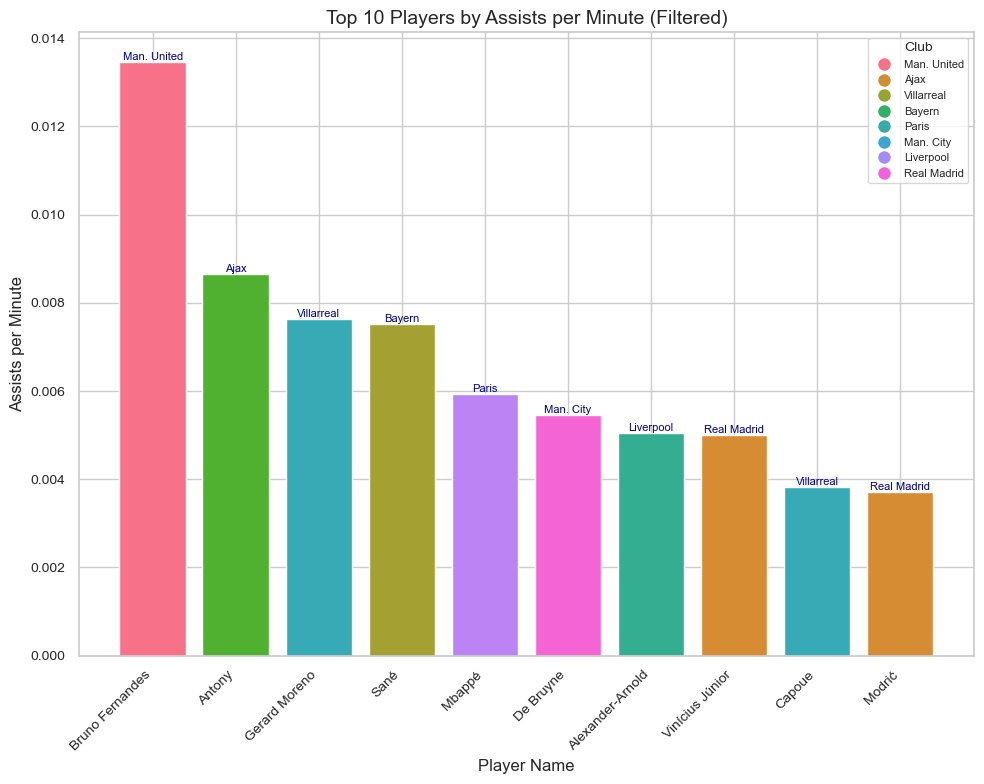

In [340]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

attacking_filtered = attacking[(attacking['assists'] > 3) & (attacking['minutes_played'] > 500)]
attacking_filtered['assists_per_minute'] = attacking_filtered['assists'] / attacking_filtered['minutes_played']


df_assists_filtered = attacking_filtered[['player_name', 'club', 'assists_per_minute']].dropna()

# Sort by assists per minute in descending order and select the top 10
df_assists_filtered_top10 = df_assists_filtered.sort_values(by='assists_per_minute', ascending=False).head(10)

# Create a unique color for each club using a colormap
colors_filtered = sns.color_palette("husl", n_colors=len(df_assists_filtered_top10['club'].unique()))

# Map each club to a color
df_assists_filtered_top10['color'] = df_assists_filtered_top10['club'].map(club_color_mapping)

# Plotting the assists per minute for the filtered players with colors based on the club
plt.figure(figsize=(10, 8))
bars_filtered = plt.bar(df_assists_filtered_top10['player_name'], df_assists_filtered_top10['assists_per_minute'], color=df_assists_filtered_top10['color'])

# Add club information to the plot
for bar, value, club in zip(bars_filtered, df_assists_filtered_top10['assists_per_minute'], df_assists_filtered_top10['club']):
    plt.text(bar.get_x() + bar.get_width() / 2, value, club,
             ha='center', va='bottom', rotation=0, color='darkblue', fontsize=8)

# Set plot labels and title
plt.title('Top 10 Players by Assists per Minute (Filtered)', fontsize=14)
plt.xlabel('Player Name', fontsize=12)
plt.ylabel('Assists per Minute', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

# Add legend
legend_labels_filtered = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=club)
                          for club, color in club_color_mapping_filtered.items()]
plt.legend(handles=legend_labels_filtered, title='Club', loc='upper right', title_fontsize='10', fontsize='8')

# Show the plot
plt.show()


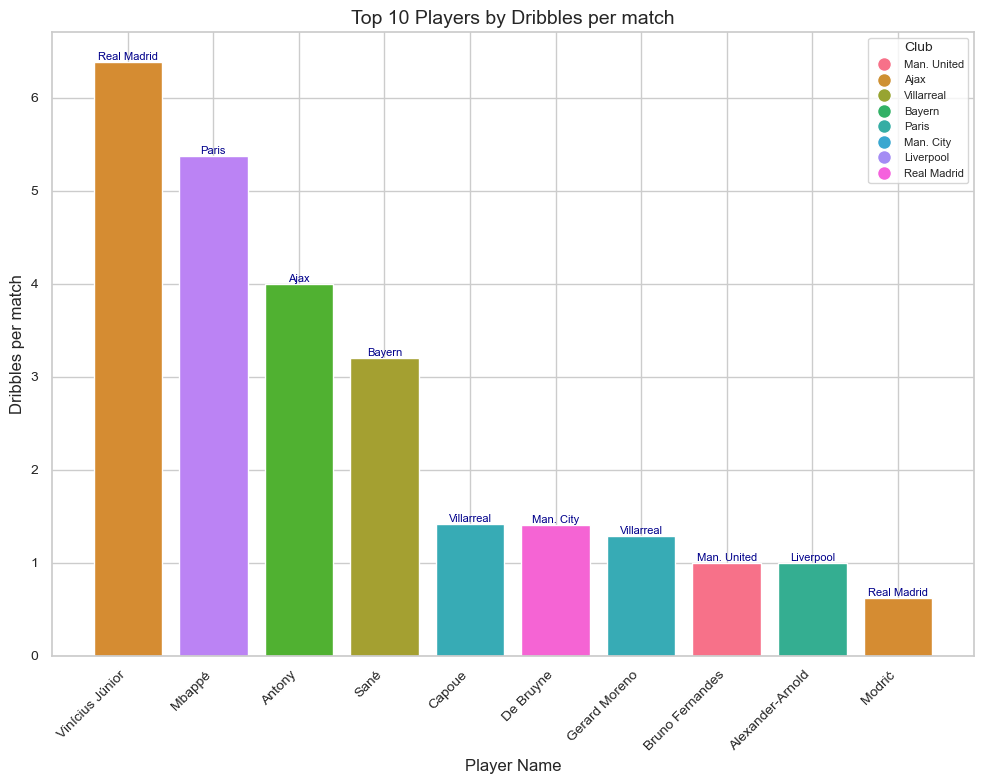

In [341]:
attacking_filtered['dribbles_per_match'] = attacking_filtered['dribbles'] / attacking_filtered['match_played']



df_attacking_filtered = attacking_filtered[['player_name', 'club', 'dribbles_per_match']].dropna()

# Sort by assists per minute in descending order and select the top 10
df_attacking_filtered_top10 = df_attacking_filtered.sort_values(by='dribbles_per_match', ascending=False).head(10)

# Create a unique color for each club using a colormap
colors_filtered = sns.color_palette("husl", n_colors=len(df_assists_filtered_top10['club'].unique()))

# Map each club to a color
df_attacking_filtered_top10['color'] = df_attacking_filtered_top10['club'].map(club_color_mapping)

# Plotting the assists per minute for the filtered players with colors based on the club
plt.figure(figsize=(10, 8))
bars_filtered = plt.bar(df_attacking_filtered_top10['player_name'], df_attacking_filtered_top10['dribbles_per_match'], color=df_attacking_filtered_top10['color'])

# Add club information to the plot
for bar, value, club in zip(bars_filtered, df_attacking_filtered_top10['dribbles_per_match'], df_attacking_filtered_top10['club']):
    plt.text(bar.get_x() + bar.get_width() / 2, value, club,
             ha='center', va='bottom', rotation=0, color='darkblue', fontsize=8)

# Set plot labels and title
plt.title('Top 10 Players by Dribbles per match', fontsize=14)
plt.xlabel('Player Name', fontsize=12)
plt.ylabel('Dribbles per match', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

# Add legend
legend_labels_filtered = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=club)
                          for club, color in club_color_mapping_filtered.items()]
plt.legend(handles=legend_labels_filtered, title='Club', loc='upper right', title_fontsize='10', fontsize='8')

# Show the plot
plt.show()


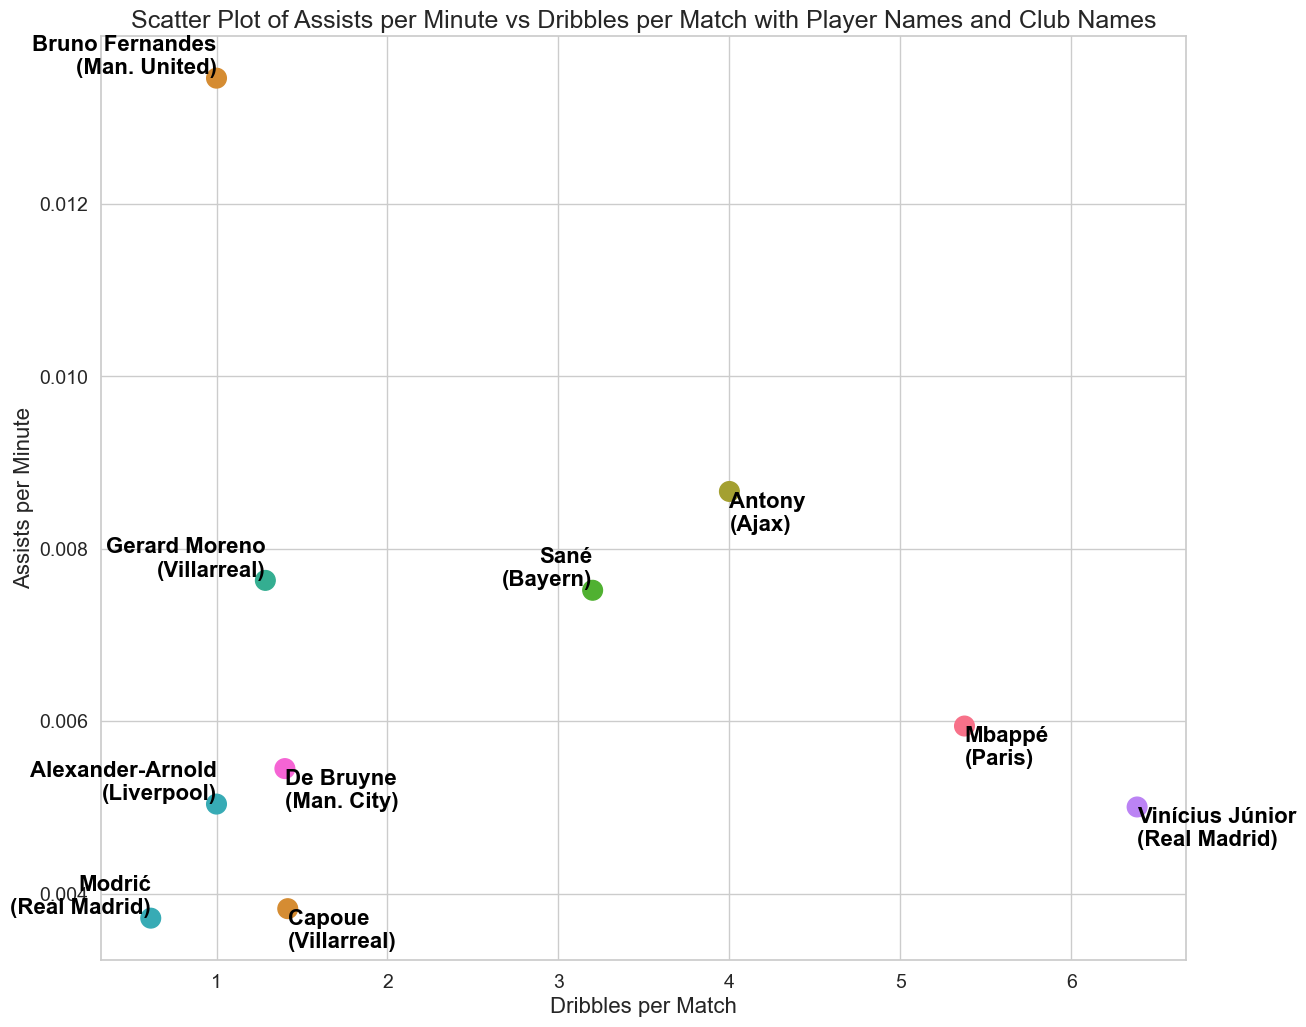

In [342]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a Seaborn style for better aesthetics
sns.set(style="whitegrid")

# Create a figure and axis
fig, ax = plt.subplots(figsize=(14, 12))

# Plotting the scatterplot with dribbles_per_match instead of dribbles
scatter = ax.scatter(attacking_filtered['dribbles_per_match'], attacking_filtered['assists_per_minute'],
                     c=df_attacking_filtered_top10['color'], label=attacking_filtered['player_name'], s=200)  # Adjust marker size

# Adding player names and club names to the markers with improved alignment and larger font
for i, (player_name, club) in enumerate(zip(attacking_filtered['player_name'], attacking_filtered['club'])):
    ax.annotate(f'{player_name}\n({club})',
                (attacking_filtered['dribbles_per_match'].iloc[i], attacking_filtered['assists_per_minute'].iloc[i]),
                fontsize=16, ha='right' if i % 2 == 0 else 'left', va='bottom' if i % 2 == 0 else 'top', color='black', weight='bold')  # Adjust font size

# Set axis labels and title with proportionate font sizes
ax.set_title('Scatter Plot of Assists per Minute vs Dribbles per Match with Player Names and Club Names', fontsize=18)
ax.set_xlabel('Dribbles per Match', fontsize=16)
ax.set_ylabel('Assists per Minute', fontsize=16)

# Set proportionate tick font sizes
ax.tick_params(axis='both', which='major', labelsize=14)

plt.grid(True)

# Show the plot
plt.show()


This plot shows us all the 10 most impactfull playmakers for the entire season as ,hence we see that while Bruno Fernandes completes just 1 dribble per game while having the highest assists/per_minute ratio someone like while Vinicius Junior completes more than 6 dribbles per game while his Assists per minute is not highest. Hence from this plot we can figure out that the most important playmaker for the entire season was 'Antony' because he completes 4 dribbles per match while also having the second highest Assists/perminute ratio.


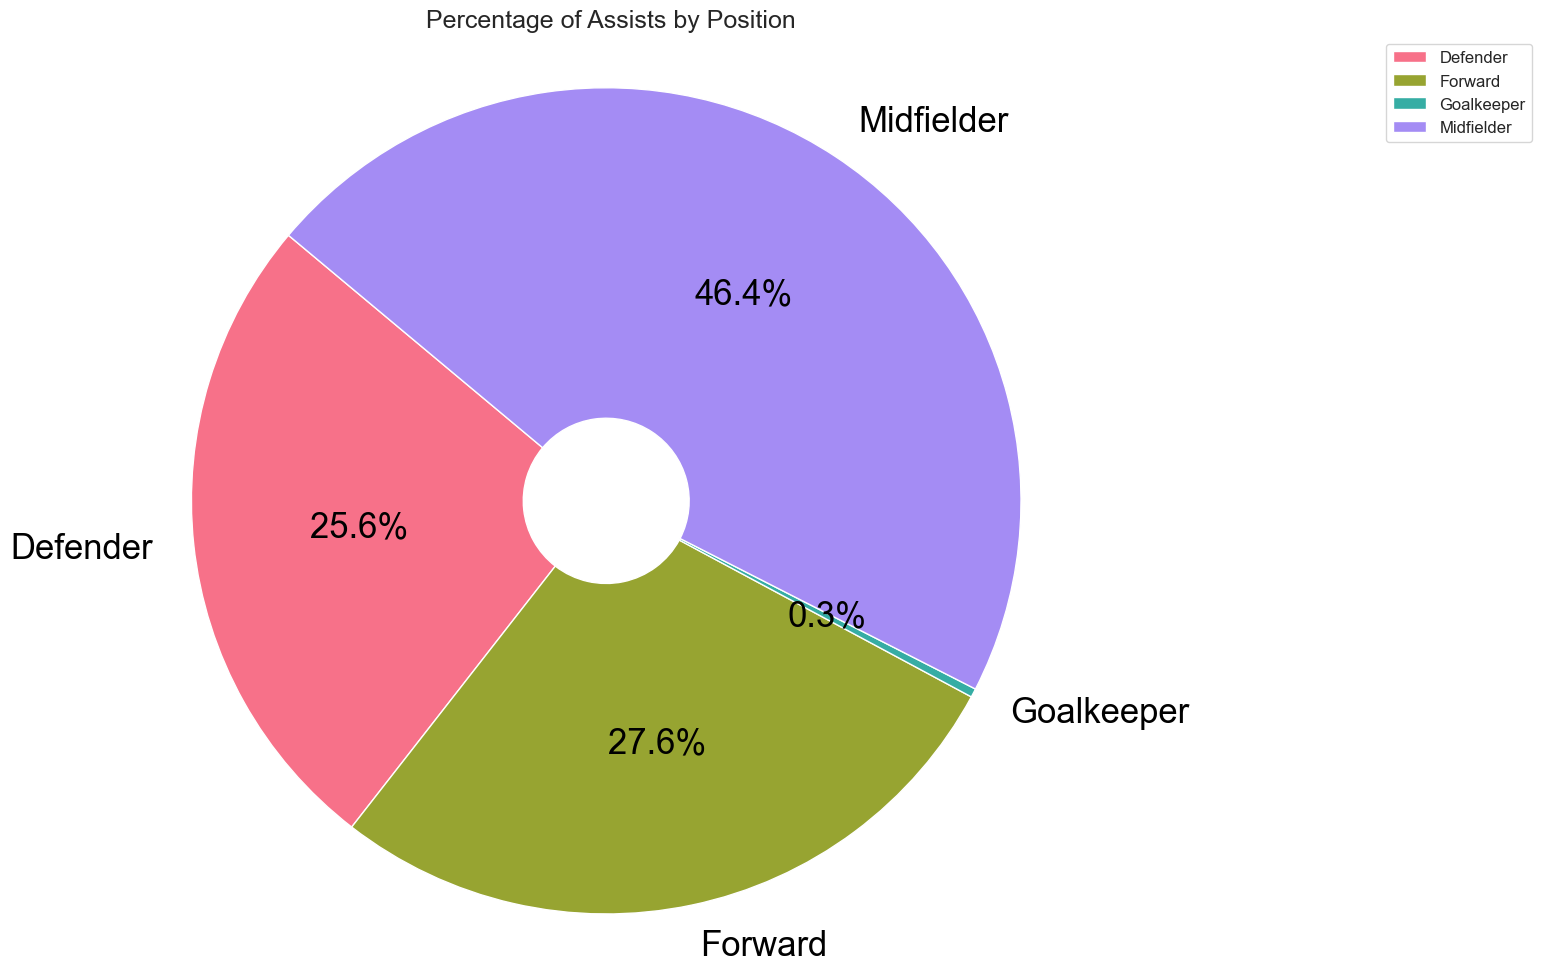

In [343]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a Seaborn style for better aesthetics
sns.set(style="whitegrid")

# Group by position and sum assists
assists_by_position = attacking.groupby('position')['assists'].sum()

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 12))

# Choose darker colors for the pie chart
colors = sns.color_palette("husl", n_colors=len(assists_by_position))

# Plot a pie chart for the assists by position with enhanced formatting
assists_by_position.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops=dict(width=0.8),
                          textprops=dict(size=25, color="black"))  # Adjust text properties

# Enhance labels and title
plt.title('Percentage of Assists by Position', fontsize=18)
plt.ylabel('')  # Hide the y-label

# Display legend with larger text
plt.legend(assists_by_position.index, loc='upper right', bbox_to_anchor=(1, 0, 0.5, 1), fontsize=12)

# Set equal aspect ratio for a more visually appealing pie chart
ax.axis('equal')

# Show the plot
plt.show()


while we expect Midfielders and Forwards to have better stats when it comes to attacking it is surprising to have 32.6% of the assists recorded by Defenders, well this is not surprising as Modern Football requires Defenders to often be attacking , so now we will figure out the most attack minded defenders in the past season

In [344]:
attacking_defenders1_top10['color']
attacking_defenders1_top10['club']

0       Liverpool
25    Real Madrid
14        Benfica
8         Sheriff
1         Leipzig
23           Ajax
17      Man. City
43      Liverpool
37    Man. United
34      Liverpool
Name: club, dtype: object

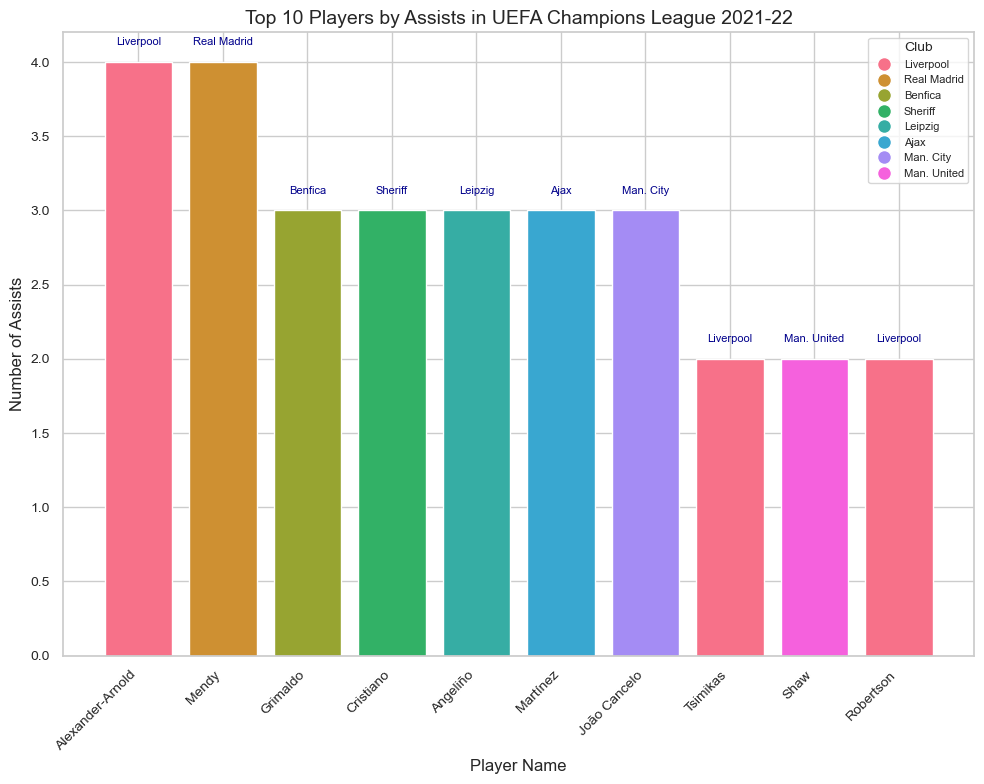

ValueError: Invalid RGBA argument: nan

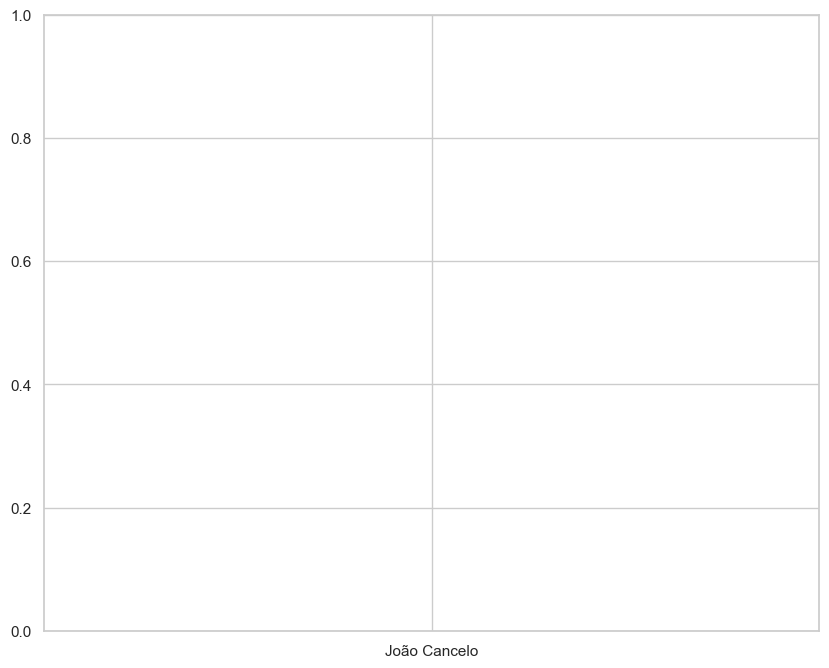

In [346]:
attacking_defenders = attacking[attacking['position'] == 'Defender']
attacking_defenders.head()

attacking_defenders = attacking_defenders[['player_name', 'club', 'assists','dribbles']].dropna()

# Sum assists for each player across all matches
attacking_defenders1 = attacking_defenders.groupby(['player_name', 'club'])['assists'].sum().reset_index()

# Sort by total assists in descending order and select the top 10
attacking_defenders1_top10 = attacking_defenders1.sort_values(by='assists', ascending=False).head(10)

# Create a unique color for each club using a colormap
colors = sns.color_palette("husl", n_colors=len(attacking_defenders1_top10['club'].unique()))

# Map each club to a color
club_color_mapping = dict(zip(attacking_defenders1_top10['club'].unique(), colors))
attacking_defenders1_top10['color'] = attacking_defenders1_top10['club'].map(club_color_mapping)


# Create a bar plot with colors based on the club
plt.figure(figsize=(10, 8))
bars = plt.bar(attacking_defenders1_top10['player_name'], attacking_defenders1_top10['assists'], color=attacking_defenders1_top10['color'])

# Add club information to the plot
for bar, value, club in zip(bars, attacking_defenders1_top10['assists'], attacking_defenders1_top10['club']):
    plt.text(bar.get_x() + bar.get_width() / 2, value + 0.1, club,
             ha='center', va='bottom', rotation=0, color='darkblue', fontsize=8)

# Set plot labels and title
plt.title('Top 10 Players by Assists in UEFA Champions League 2021-22', fontsize=14)
plt.xlabel('Player Name', fontsize=12)
plt.ylabel('Number of Assists', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

# Add legend
legend_labels = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=club)
                 for club, color in club_color_mapping.items()]
plt.legend(handles=legend_labels, title='Club', loc='upper right', title_fontsize='10', fontsize='8')

# Show the plot
plt.show()



attacking_defenders2 = attacking_defenders.groupby(['player_name', 'club'])['dribbles'].sum().reset_index()

# Sort by total assists in descending order and select the top 10
attacking_defenders2_top10 = attacking_defenders2.sort_values(by='dribbles', ascending=False).head(10)

# Create a unique color for each club using a colormap
#colors = sns.color_palette("husl", n_colors=len(df_assists_top10['club'].unique()))

# Map each club to a color
club_color_mapping = dict(zip(attacking_defenders2_top10['club'].unique(), colors))
attacking_defenders2_top10['color'] = attacking_defenders2_top10['club'].map(club_color_mapping)

# Create a bar plot with colors based on the club
plt.figure(figsize=(10, 8))
bars = plt.bar(attacking_defenders2_top10['player_name'], attacking_defenders2_top10['dribbles'], color=attacking_defenders2_top10['color'])

# Add club information to the plot
for bar, value, club in zip(bars, attacking_defenders2_top10['dribbles'], attacking_defenders2_top10['club']):
    plt.text(bar.get_x() + bar.get_width() / 2, value + 0.1, club,
             ha='center', va='bottom', rotation=0, color='darkblue', fontsize=8)

# Set plot labels and title
plt.title('Top 10 Players by Dribbles in UEFA Champions League 2021-22', fontsize=14)
plt.xlabel('Player Name', fontsize=12)
plt.ylabel('Number of Dribbles', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

# Add legend
legend_labels = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=club)
                 for club, color in club_color_mapping.items()]
plt.legend(handles=legend_labels, title='Club', loc='upper right', title_fontsize='10', fontsize='8')

# Show the plot
plt.show()

From the Above plots we can clearly figure out that tha most Attack minded defenders was Joao Cancelo, who recorded 3 assists while completeing the most amounts of Dribbles. Another fact to notice is that in both the plots all the players who appear are Either Right Backs or Left Backs they are also called Full Backs , hence showing how modern football reqires their Full Backs to keep attacking while also defending.

Now since we are talking about attacking players instead of just looking at assists and dribbles we also take into consideration the number of goals socred 

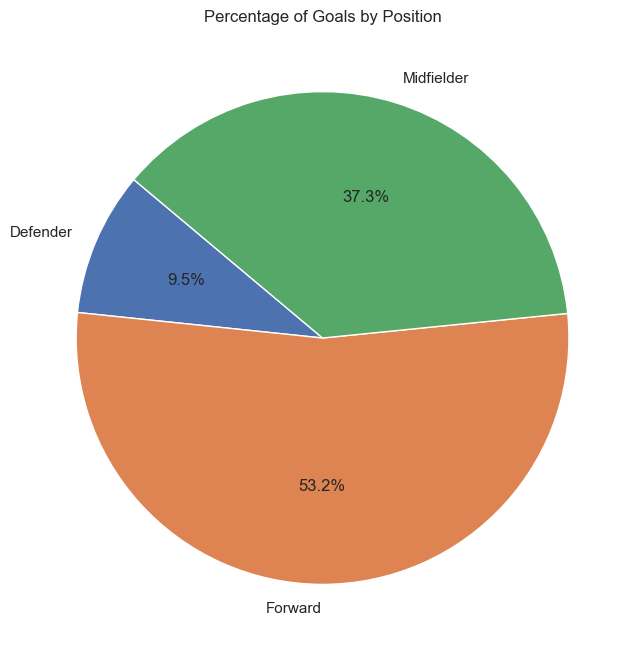

In [347]:
goals_by_position = goals.groupby('position')['goals'].sum()

# Now, let's plot a pie chart
plt.figure(figsize=(8, 8))
goals_by_position.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Goals by Position')
plt.ylabel('')  # Hide the y-label
plt.show()

As expected most goals are scored by Forwards or Midfielders, since these are the players spending most of their time in the opposition half of the pitch

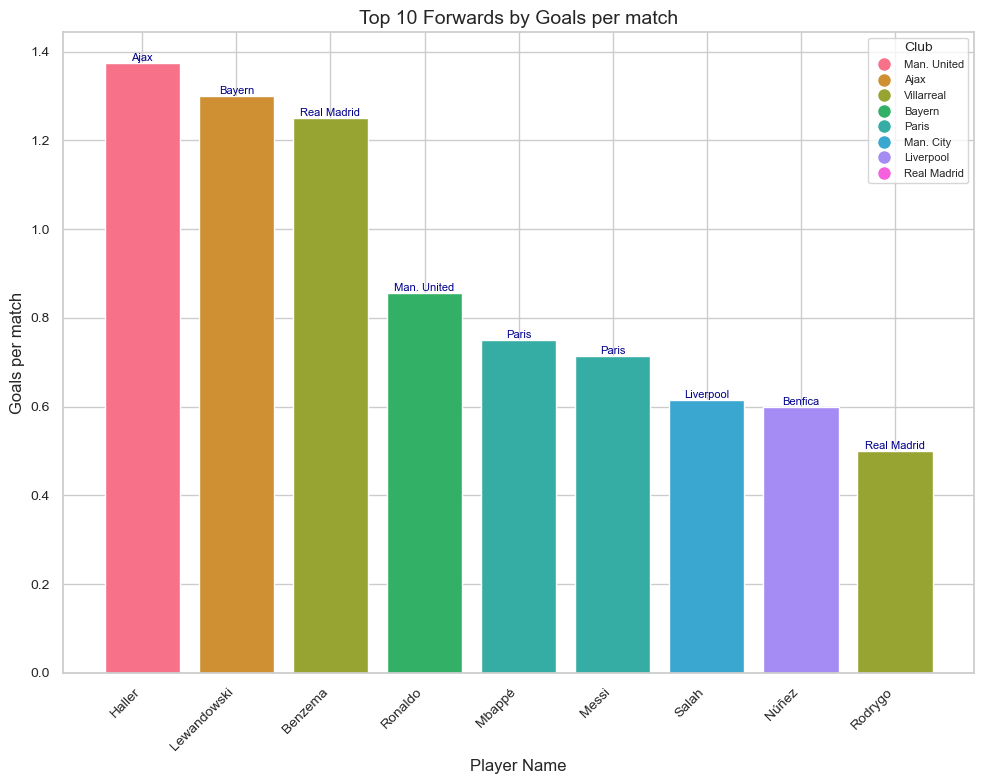

In [348]:
df_attacking_1 = goals[(goals.position == "Forward") & (goals.goals >=5)]

df_attacking_1=df_attacking_1[['player_name', 'club', 'goals','match_played']].dropna()
df_attacking_1['goals_match']=df_attacking_1['goals']/df_attacking_1['match_played']

# Sort by assists per minute in descending order and select the top 10
df_attacking_1_top10 = df_attacking_1.sort_values(by='goals_match', ascending=False).head(10)

# Create a unique color for each club using a colormap
club_color_mapping = dict(zip(df_attacking_1_top10['club'].unique(), colors))


# Map each club to a color
df_attacking_1_top10['color'] = df_attacking_1_top10['club'].map(club_color_mapping)

# Plotting the assists per minute for the filtered players with colors based on the club
plt.figure(figsize=(10, 8))
bars_filtered = plt.bar(df_attacking_1_top10['player_name'], df_attacking_1_top10['goals_match'], color=df_attacking_1_top10['color'])

# Add club information to the plot
for bar, value, club in zip(bars_filtered, df_attacking_1_top10['goals_match'], df_attacking_1_top10['club']):
    plt.text(bar.get_x() + bar.get_width() / 2, value, club,
             ha='center', va='bottom', rotation=0, color='darkblue', fontsize=8)

# Set plot labels and title
plt.title('Top 10 Forwards by Goals per match', fontsize=14)
plt.xlabel('Player Name', fontsize=12)
plt.ylabel('Goals per match', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

# Add legend
legend_labels_filtered = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=club)
                          for club, color in club_color_mapping_filtered.items()]
plt.legend(handles=legend_labels_filtered, title='Club', loc='upper right', title_fontsize='10', fontsize='8')

# Show the plot
plt.show()

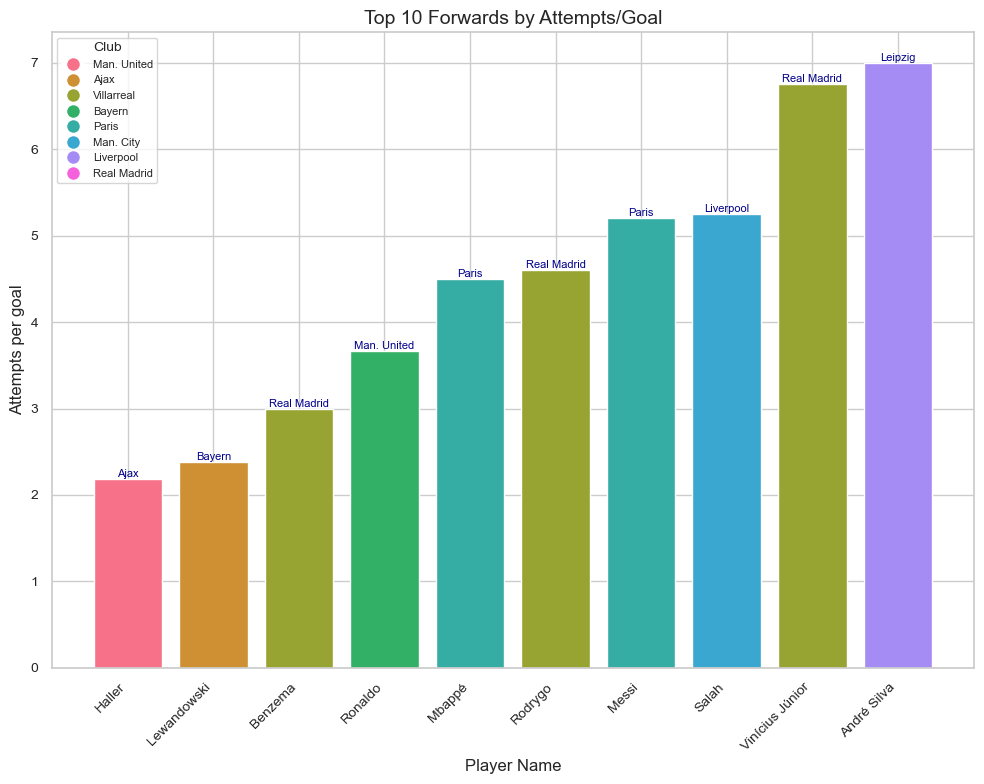

In [349]:
merged_data = goals.merge(attempts[['player_name', 'club', 'position', 'total_attempts']], on=['player_name', 'club', 'position'], how='left')
merged_data['attempts_per_match'] = merged_data['total_attempts'] / merged_data['match_played']

forwards_data=merged_data[(merged_data.position == "Forward") & (merged_data.total_attempts>=20)]

forwards_data['Attempts_per_Goal'] = forwards_data['total_attempts'] / forwards_data['goals']

forwards_data_top10 = forwards_data.sort_values(by='Attempts_per_Goal', ascending=True).head(10)


club_color_mapping = dict(zip(forwards_data_top10['club'].unique(), colors))


# Map each club to a color
forwards_data_top10['color'] = forwards_data_top10['club'].map(club_color_mapping)

# Plotting the assists per minute for the filtered players with colors based on the club
plt.figure(figsize=(10, 8))
bars_filtered = plt.bar(forwards_data_top10['player_name'], forwards_data_top10['Attempts_per_Goal'], color=forwards_data_top10['color'])

# Add club information to the plot
for bar, value, club in zip(bars_filtered, forwards_data_top10['Attempts_per_Goal'], forwards_data_top10['club']):
    plt.text(bar.get_x() + bar.get_width() / 2, value, club,
             ha='center', va='bottom', rotation=0, color='darkblue', fontsize=8)

# Set plot labels and title
plt.title('Top 10 Forwards by Attempts/Goal', fontsize=14)
plt.xlabel('Player Name', fontsize=12)
plt.ylabel('Attempts per goal', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

# Add legend
legend_labels_filtered = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=club)
                          for club, color in club_color_mapping_filtered.items()]
plt.legend(handles=legend_labels_filtered, title='Club', loc='upper left', title_fontsize='10', fontsize='8')

# Show the plot
plt.show()

In [350]:
merged_data = goals.merge(attempts[['player_name', 'club', 'position', 'total_attempts']], on=['player_name', 'club', 'position'], how='left')
merged_data = merged_data.merge(attacking[['player_name', 'club', 'position', 'dribbles','match_played']], on=['player_name', 'club', 'position'], how='left')


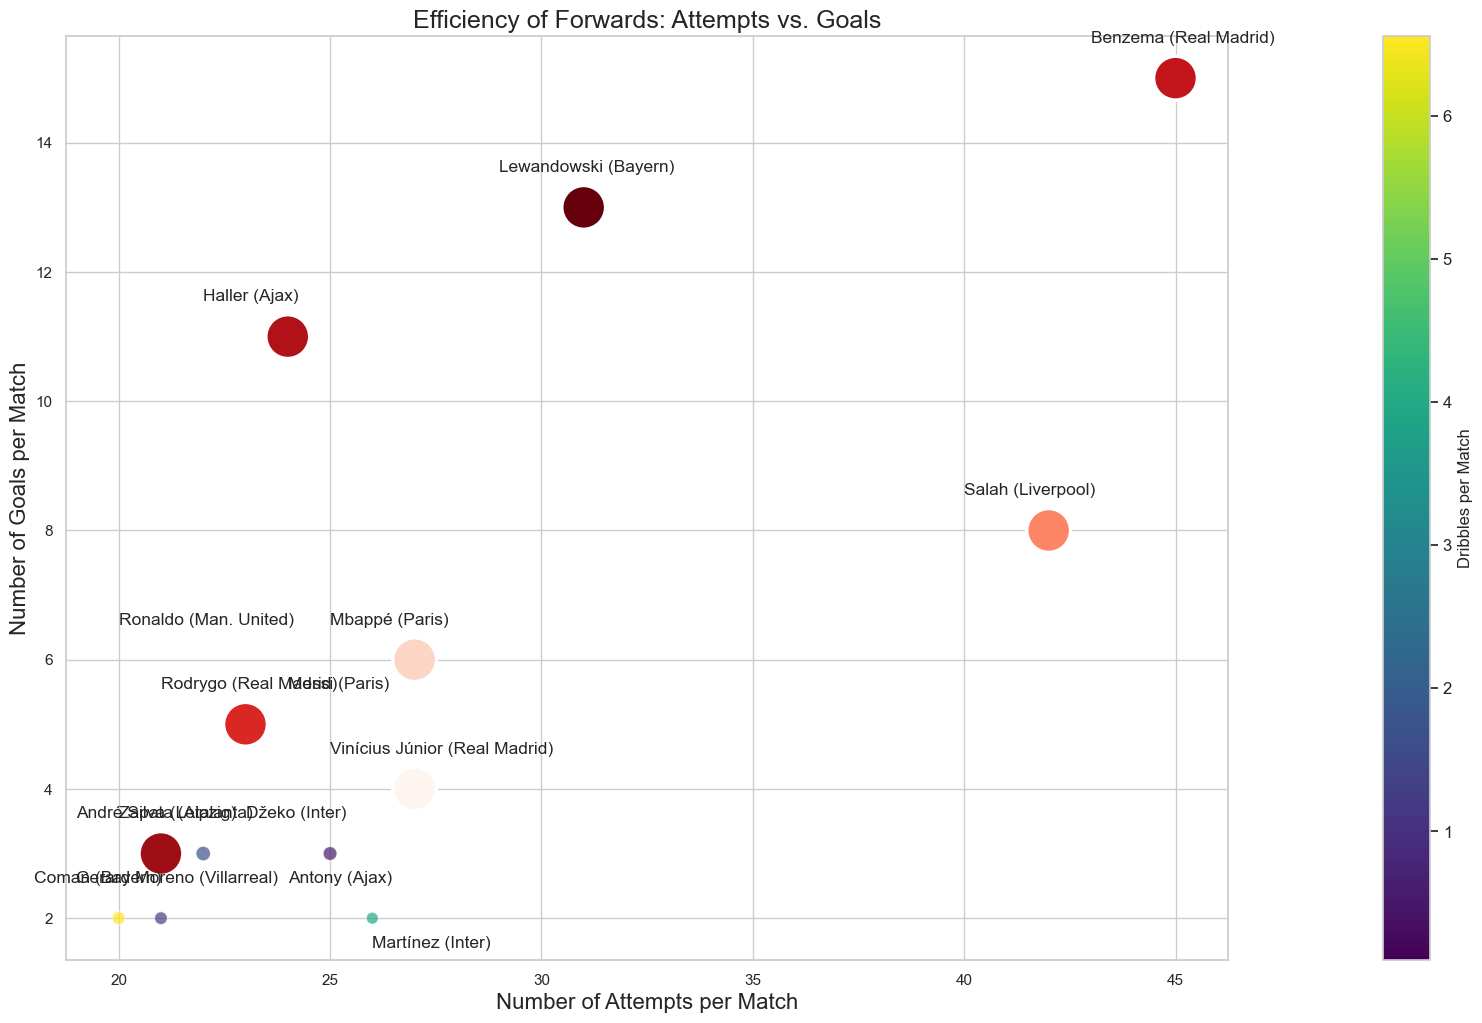

In [351]:
merged_data = goals.merge(attempts[['player_name', 'club', 'position', 'total_attempts']], on=['player_name', 'club', 'position'], how='left')
merged_data = merged_data.merge(attacking[['player_name', 'club', 'position', 'dribbles','assists']], on=['player_name', 'club', 'position'], how='left')

merged_data['attempts_per_match'] = merged_data['total_attempts'] / merged_data['match_played']
merged_data['dribbles_match'] = merged_data['dribbles'] / merged_data['match_played']


forwards_data=merged_data[(merged_data.position == "Forward") & (merged_data.total_attempts>=20)]

forwards_data['efficiency'] =  forwards_data['goals']/forwards_data['total_attempts']

forwards_data_top10 = forwards_data.sort_values(by='efficiency', ascending=False).head(10)

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.cm import ScalarMappable

# Create a scatter plot
plt.figure(figsize=(20, 12))
scatter = sns.scatterplot(x='total_attempts', y='goals', size='efficiency', sizes=(50, 300), hue='dribbles_match', data=forwards_data, palette='viridis', alpha=0.7, legend=False)

# Highlight the top 10 most efficient forwards with distinctive color or shape
sns.scatterplot(x='total_attempts', y='goals', size='efficiency', sizes=(1000, 1000), hue='dribbles_match', data=forwards_data_top10, palette='Reds_r', alpha=1)

# Remove the default legend
scatter.legend_.remove()

# Set labels and title
plt.title('Efficiency of Forwards: Attempts vs. Goals', fontsize=18)  # Update title
plt.xlabel('Number of Attempts per Match', fontsize=16)  # Update x-axis label
plt.ylabel('Number of Goals per Match', fontsize=16)  # Update y-axis label

# Add names and club labels to each data point with labels slightly above the points
for i, row in forwards_data.iterrows():
    plt.text(row['total_attempts']-2, row['goals'] + 0.5, f"{row['player_name']} ({row['club']})", fontsize=12.5, ha='left', va='bottom')  # Increase text size and adjust vertical alignment

# Create a color map for the legend
sm = ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=forwards_data['dribbles_match'].min(), vmax=forwards_data['dribbles_match'].max()))
sm.set_array([])

# Add color bar for the legend
cbar = plt.colorbar(sm, label='Dribbles per Match', orientation='vertical', pad=0.1)
cbar.ax.tick_params(labelsize=12)  # Adjust color bar tick label size

# Add an explanation or caption
#plt.annotate('This scatter plot illustrates the efficiency of forwards based on attempts and goals per match. '
 #            'The size of each point represents efficiency, while color indicates the average number of dribbles per match.',
  #           xy=(0.5, -0.1), ha='center', va='center', xycoords='axes fraction', textcoords='axes fraction', fontsize=14, color='gray')  # Update annotation

# Show the plot
plt.show()


In [352]:
goals = goals.merge(attacking[['player_name', 'assists', 'dribbles']], on='player_name', how='left')
goals.head()

,serial,player_name,club,position,goals,right_foot,left_foot,headers,others,inside_area,outside_areas,penalties,match_played,assists,dribbles
0,1,Benzema,Real Madrid,Forward,15,11,1,3,0,13,2,3,12,1.0,18.0
1,2,Lewandowski,Bayern,Forward,13,8,3,1,1,13,0,3,10,3.0,1.0
2,3,Haller,Ajax,Forward,11,3,4,3,1,11,0,1,8,1.0,9.0
3,4,Salah,Liverpool,Forward,8,0,8,0,0,7,1,1,13,2.0,49.0
4,5,Nkunku,Leipzig,Midfielder,7,3,1,3,0,7,0,0,6,NaN,NaN


In [353]:
# Filtering the dataframe for players with at least 5 goals and 3 assists
filtered_data = goals[(goals['goals'] >= 5) & (goals['assists'] >= 3)]

In [354]:
filtered_data

,serial,player_name,club,position,goals,right_foot,left_foot,headers,others,inside_area,outside_areas,penalties,match_played,assists,dribbles
1,2,Lewandowski,Bayern,Forward,13,8,3,1,1,13,0,3,10,3.0,1.0
6,7,Mbappé,Paris,Forward,6,6,0,0,0,6,0,0,8,4.0,43.0
10,7,Sané,Bayern,Midfielder,6,1,5,0,0,3,3,0,10,6.0,32.0


In [355]:
merged_data.head()

,serial,player_name,club,position,goals,right_foot,left_foot,headers,others,inside_area,outside_areas,penalties,match_played,total_attempts,dribbles,assists,attempts_per_match,dribbles_match
0,1,Benzema,Real Madrid,Forward,15,11,1,3,0,13,2,3,12,45.0,18.0,1.0,3.750000,1.500000
1,2,Lewandowski,Bayern,Forward,13,8,3,1,1,13,0,3,10,31.0,1.0,3.0,3.100000,0.100000
2,3,Haller,Ajax,Forward,11,3,4,3,1,11,0,1,8,24.0,9.0,1.0,3.000000,1.125000
3,4,Salah,Liverpool,Forward,8,0,8,0,0,7,1,1,13,42.0,49.0,2.0,3.230769,3.769231
4,5,Nkunku,Leipzig,Midfielder,7,3,1,3,0,7,0,0,6,17.0,NaN,NaN,2.833333,NaN


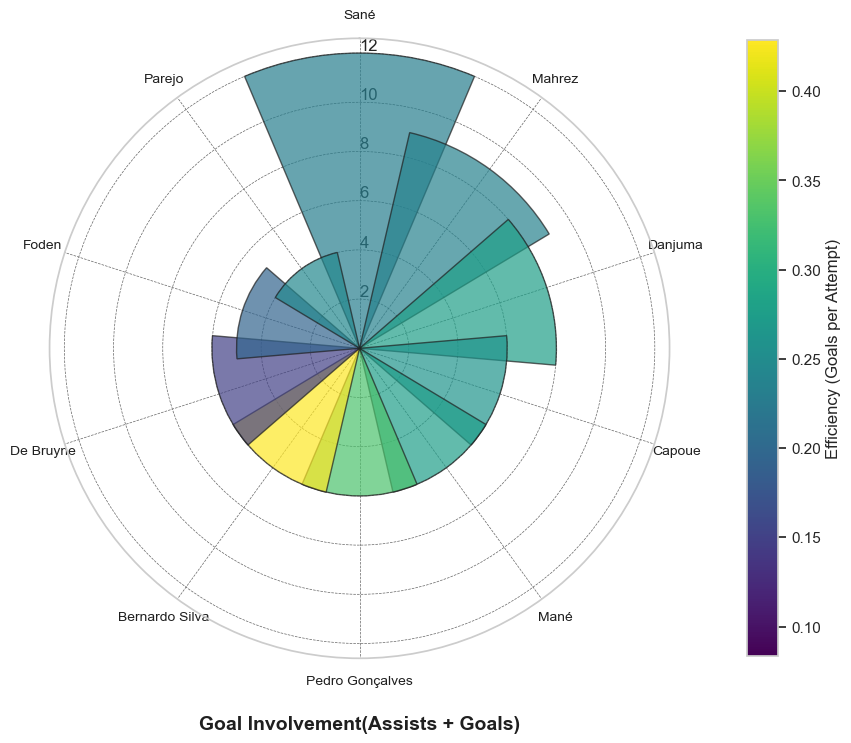

In [357]:
midfielders_data=merged_data[(merged_data.position == "Midfielder")]

# Calculate goal involvement
midfielders_data['goal_involvement'] = midfielders_data['goals'] + midfielders_data['assists']
merged_data['efficiency'] = merged_data['goals'] / merged_data['total_attempts']

# Sort data by goal involvement
midfielders_data = midfielders_data.sort_values(by='goal_involvement', ascending=False).head(10)


# Set up the plot
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
ax.set_theta_direction(-1)
ax.set_theta_offset(np.pi / 2.0)
ax.set_rlabel_position(0)

# Plot the radar chart with improved colors
theta = np.linspace(0, 2 * np.pi, len(midfielders_data), endpoint=False)
bars = ax.bar(theta, midfielders_data['goal_involvement'], color=plt.cm.viridis(midfielders_data['efficiency'] / midfielders_data['efficiency'].max()), edgecolor='#1F1F1F', alpha=0.7)

# Create a color map for the legend
sm = ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=midfielders_data['efficiency'].min(), vmax=midfielders_data['efficiency'].max()))
sm.set_array([])

# Add color bar for the legend
cbar = plt.colorbar(sm, pad=0.1, fraction=0.1, shrink=0.8, orientation='vertical')
cbar.set_label('Efficiency (Goals per Attempt)')

# Set labels for each player with adjusted size and color
ax.set_xticks(theta)
ax.set_xticklabels(midfielders_data['player_name'], fontsize=10, color='#1F1F1F')

# Add grid lines
ax.grid(color='#666666', linestyle='--', linewidth=0.5)
ax.tick_params(axis='y', labelsize=12, pad=20,right=True)
# Add a big and bold label for goal involvement
ax.set_xlabel('Goal Involvement(Assists + Goals)', labelpad=20, size=14, weight='bold', color='#1F1F1F')

# Adjust visibility and color of axis labels
for tick, label in zip(ax.yaxis.get_major_ticks(), midfielders_data['goal_involvement']):
    tick.label2.set_visible(True)
    tick.label2.set_color('#1F1F1F')
    tick.label2.set_text(str(label))  # Display the goal involvement number

# Add an explanation or caption
#plt.annotate("The radar plot showcases the goal involvement of the top 10 midfielders. Each point on the radar represents a player, and the distance from the center indicates their total goal involvement (goals + assists). The color of each bar represents the shooting efficiency (goals per attempt).",
 #            xy=(0.5, -0.15), ha='center', va='center', xycoords='axes fraction', textcoords='axes fraction', fontsize=10, color='#1F1F1F')

# Show the plot
plt.show()

Hence we see that the most influential attacking players of the season were Sane,Lewandowski and Mbappe.

In [358]:
merged_data['attempts_per_goal'] = merged_data['goals'] / merged_data['total_attempts']

# Display the head of the updated merged dataframe
merged_data.head()

,serial,player_name,club,position,goals,right_foot,left_foot,headers,others,inside_area,outside_areas,penalties,match_played,total_attempts,dribbles,assists,attempts_per_match,dribbles_match,efficiency,attempts_per_goal
0,1,Benzema,Real Madrid,Forward,15,11,1,3,0,13,2,3,12,45.0,18.0,1.0,3.750000,1.500000,0.333333,0.333333
1,2,Lewandowski,Bayern,Forward,13,8,3,1,1,13,0,3,10,31.0,1.0,3.0,3.100000,0.100000,0.419355,0.419355
2,3,Haller,Ajax,Forward,11,3,4,3,1,11,0,1,8,24.0,9.0,1.0,3.000000,1.125000,0.458333,0.458333
3,4,Salah,Liverpool,Forward,8,0,8,0,0,7,1,1,13,42.0,49.0,2.0,3.230769,3.769231,0.190476,0.190476
4,5,Nkunku,Leipzig,Midfielder,7,3,1,3,0,7,0,0,6,17.0,NaN,NaN,2.833333,NaN,0.411765,0.411765


In [359]:
filtered_players = merged_data[merged_data['goals'] >= 5]
filtered_players['attempts_per_goal'] = filtered_players['goals'] / filtered_players['total_attempts']

# Display the head of the filtered dataframe
filtered_players.sort_values('attempts_per_goal', ascending=False).head(10)

,serial,player_name,club,position,goals,right_foot,left_foot,headers,others,inside_area,outside_areas,penalties,match_played,total_attempts,dribbles,assists,attempts_per_match,dribbles_match,efficiency,attempts_per_goal
2,3,Haller,Ajax,Forward,11,3,4,3,1,11,0,1,8,24.0,9.0,1.0,3.000000,1.125000,0.458333,0.458333
1,2,Lewandowski,Bayern,Forward,13,8,3,1,1,13,0,3,10,31.0,1.0,3.0,3.100000,0.100000,0.419355,0.419355
4,5,Nkunku,Leipzig,Midfielder,7,3,1,3,0,7,0,0,6,17.0,NaN,NaN,2.833333,NaN,0.411765,0.411765
7,7,Núñez,Benfica,Forward,6,5,0,1,0,6,0,1,10,15.0,NaN,NaN,1.500000,NaN,0.400000,0.400000
11,12,Firmino,Liverpool,Midfielder,5,3,1,1,0,4,1,0,6,13.0,NaN,NaN,2.166667,NaN,0.384615,0.384615
0,1,Benzema,Real Madrid,Forward,15,11,1,3,0,13,2,3,12,45.0,18.0,1.0,3.750000,1.500000,0.333333,0.333333
8,7,Ronaldo,Man. United,Forward,6,5,0,1,0,4,2,0,7,22.0,NaN,NaN,3.142857,NaN,0.272727,0.272727
9,7,Danjuma,Villarreal,Midfielder,6,3,3,0,0,6,0,1,11,25.0,31.0,2.0,2.272727,2.818182,0.240000,0.240000
12,12,Mané,Liverpool,Midfielder,5,2,3,0,0,5,0,0,13,21.0,17.0,1.0,1.615385,1.307692,0.238095,0.238095
6,7,Mbappé,Paris,Forward,6,6,0,0,0,6,0,0,8,27.0,43.0,4.0,3.375000,5.375000,0.222222,0.222222


These are the 10 mos effecient forwards of the entire season.

we also saw that 37.3% of goals were scored by midfielders hence we look to see who are the most attack minded midfielders.

In [83]:
filtered_midfielders = merged_data[(merged_data['position'] == 'Midfielder') & (merged_data['goals'] >= 5)]
filtered_midfielders['attempts_per_goal'] = filtered_midfielders['goals'] / filtered_midfielders['total_attempts']
filtered_midfielders.head()

C:\Users\91996\AppData\Local\Temp\ipykernel_14772\3305348613.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,serial,player_name,club,position,goals,right_foot,left_foot,headers,others,inside_area,outside_areas,penalties,match_played,assists,dribbles,total_attempts,attempts_per_match,attempts_per_goal
4,5,Nkunku,Leipzig,Midfielder,7,3,1,3,0,7,0,0,6,NaN,NaN,17.0,2.833333,0.411765
5,5,Mahrez,Man. City,Midfielder,7,1,4,2,0,7,0,2,12,2.0,28.0,37.0,3.083333,0.189189
9,7,Danjuma,Villarreal,Midfielder,6,3,3,0,0,6,0,1,11,2.0,31.0,25.0,2.272727,0.240000
10,7,Sané,Bayern,Midfielder,6,1,5,0,0,3,3,0,10,6.0,32.0,33.0,3.300000,0.181818
11,12,Firmino,Liverpool,Midfielder,5,3,1,1,0,4,1,0,6,NaN,NaN,13.0,2.166667,0.384615


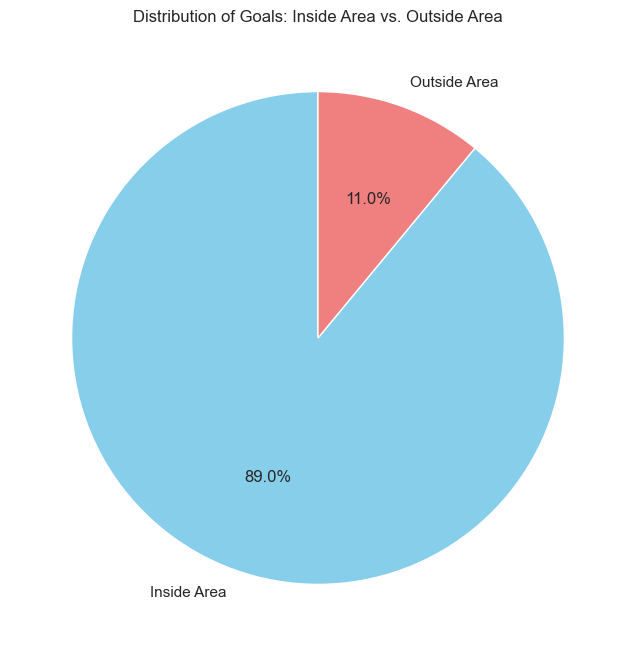

In [360]:
#plt.figure(figsize=(10, 6))
#sns.barplot(data=goals[['inside_area', 'outside_areas']], palette='Set3')
#plt.title('Comparison of Inside Area vs. Outside Area')
#plt.show()

plt.figure(figsize=(8, 8))

# Calculate the sum values
inside_area_sum = goals['inside_area'].sum()
outside_area_sum = goals['outside_areas'].sum()

# Data for the pie chart
data = [inside_area_sum, outside_area_sum]
labels = ['Inside Area', 'Outside Area']
colors = ['skyblue', 'lightcoral']

# Create a pie chart
plt.pie(data, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Add a title
plt.title('Distribution of Goals: Inside Area vs. Outside Area')

# Show the plot
plt.show()


hence we can see that most goals are from inside_area

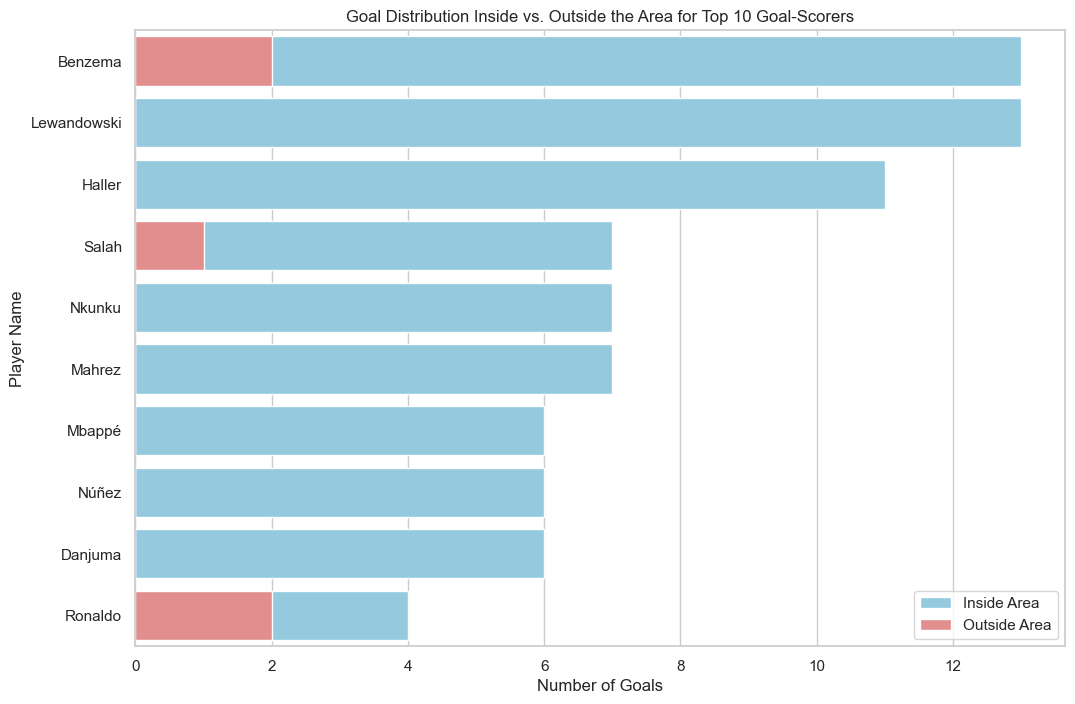

In [361]:


plt.figure(figsize=(12, 8))

# Sort the data by 'inside_area' for better visualization
sorted_top_10_goals = sorted_top_10_goals.sort_values('inside_area', ascending=False)

# Plotting the data using a horizontal stacked bar chart
barplot = sns.barplot(x='inside_area', y='player_name', data=sorted_top_10_goals, color='skyblue', label='Inside Area')
barplot = sns.barplot(x='outside_areas', y='player_name', data=sorted_top_10_goals, color='lightcoral', label='Outside Area')

# Add a title and labels
plt.title('Goal Distribution Inside vs. Outside the Area for Top 10 Goal-Scorers')
plt.xlabel('Number of Goals')
plt.ylabel('Player Name')



# Add legend
plt.legend()

# Show the plot
plt.show()



Here are the ten best target men of UCL season 2021-2022

Thus we see that only 3 players have scored goals from outside the box


Now we look to see who are the best penalty takers for the season ucl 2021-22

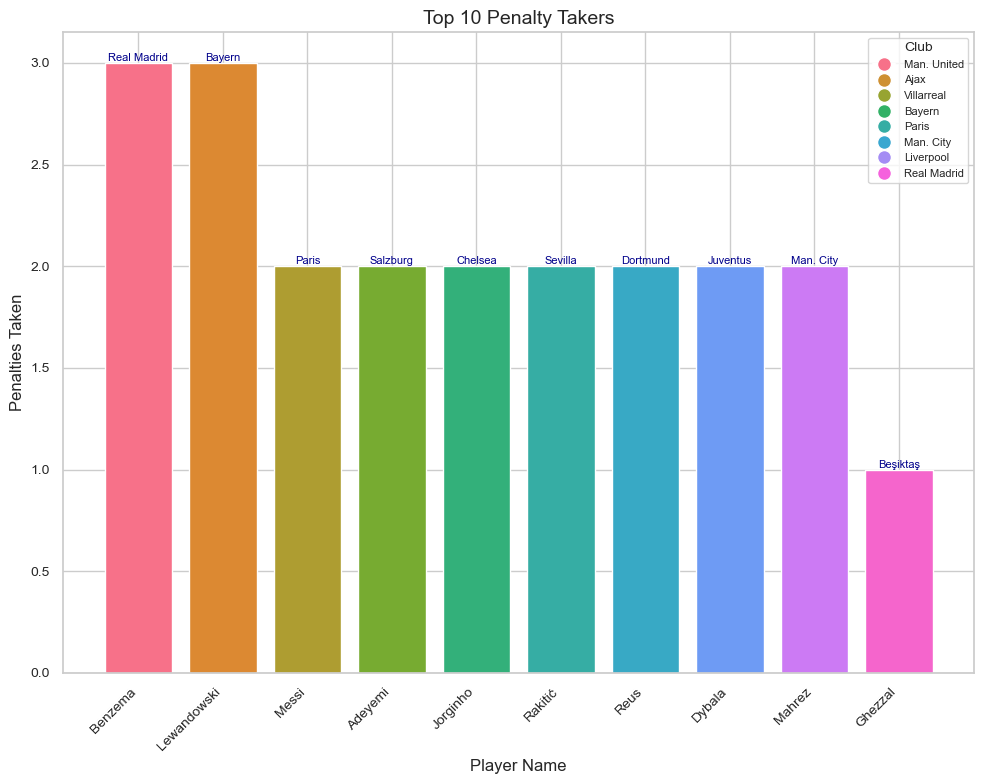

In [362]:


top_10_penalty_takers = goals.sort_values(by='penalties', ascending=False).head(10)
colors = sns.color_palette("husl", n_colors=len(top_10_penalty_takers['club'].unique()))


club_color_mapping = dict(zip(top_10_penalty_takers['club'].unique(), colors))


# Map each club to a color
top_10_penalty_takers['color'] = top_10_penalty_takers['club'].map(club_color_mapping)

# Plotting the assists per minute for the filtered players with colors based on the club
plt.figure(figsize=(10, 8))
bars_filtered = plt.bar(top_10_penalty_takers['player_name'], top_10_penalty_takers['penalties'], color=top_10_penalty_takers['color'])

# Add club information to the plot
for bar, value, club in zip(bars_filtered, top_10_penalty_takers['penalties'], top_10_penalty_takers['club']):
    plt.text(bar.get_x() + bar.get_width() / 2, value, club,
             ha='center', va='bottom', rotation=0, color='darkblue', fontsize=8)

# Set plot labels and title
plt.title('Top 10 Penalty Takers', fontsize=14)
plt.xlabel('Player Name', fontsize=12)
plt.ylabel('Penalties Taken', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

# Add legend
legend_labels_filtered = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=club)
                          for club, color in club_color_mapping_filtered.items()]
plt.legend(handles=legend_labels_filtered, title='Club', loc='upper right', title_fontsize='10', fontsize='8')

# Show the plot
plt.show()



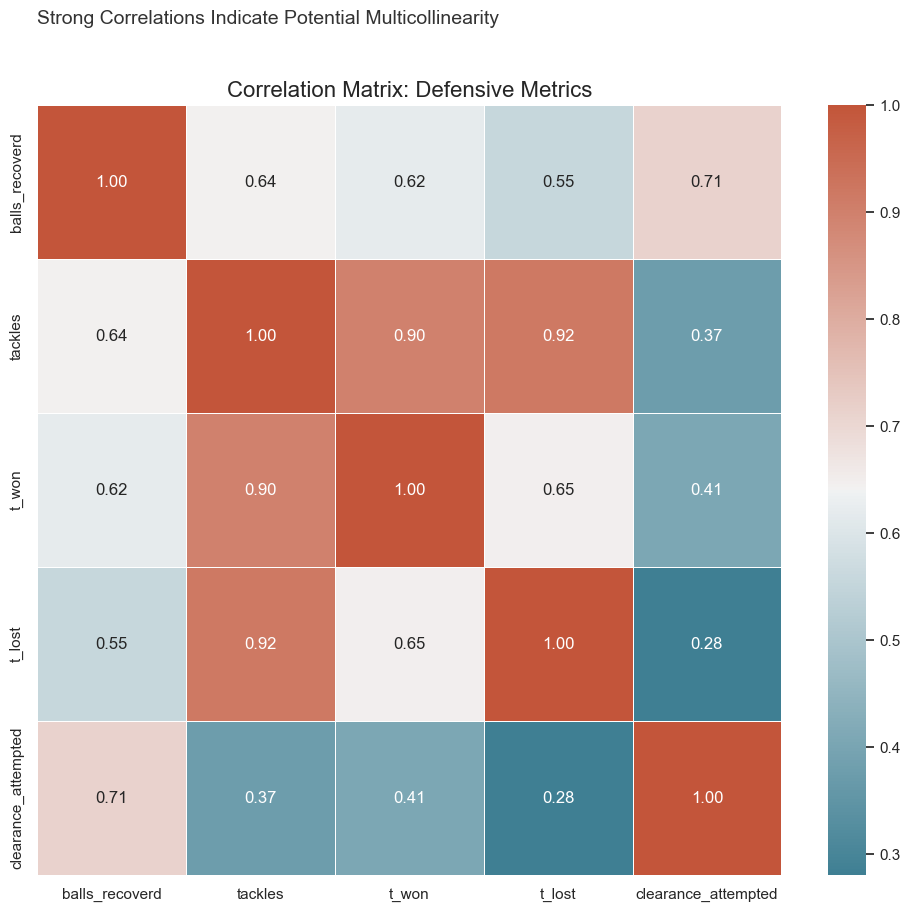

In [363]:
# Calculate the correlation matrix
correlation_matrix = defending[['balls_recoverd', 'tackles', 't_won', 't_lost', 'clearance_attempted']].corr()

# Set up the plot
plt.figure(figsize=(12, 10))

# Create a custom diverging colormap
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Plot the heatmap with annotations, using a coolwarm color map
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap=cmap, fmt='.2f', linewidths=.5, annot_kws={"size": 12})

# Set the title
plt.title('Correlation Matrix: Defensive Metrics', fontsize=16)

# Add header
plt.text(0, 1.1, 'Strong Correlations Indicate Potential Multicollinearity', fontsize=14, color='#333333', ha='left', va='bottom', transform=plt.gca().transAxes)

# Show the plot
plt.show()


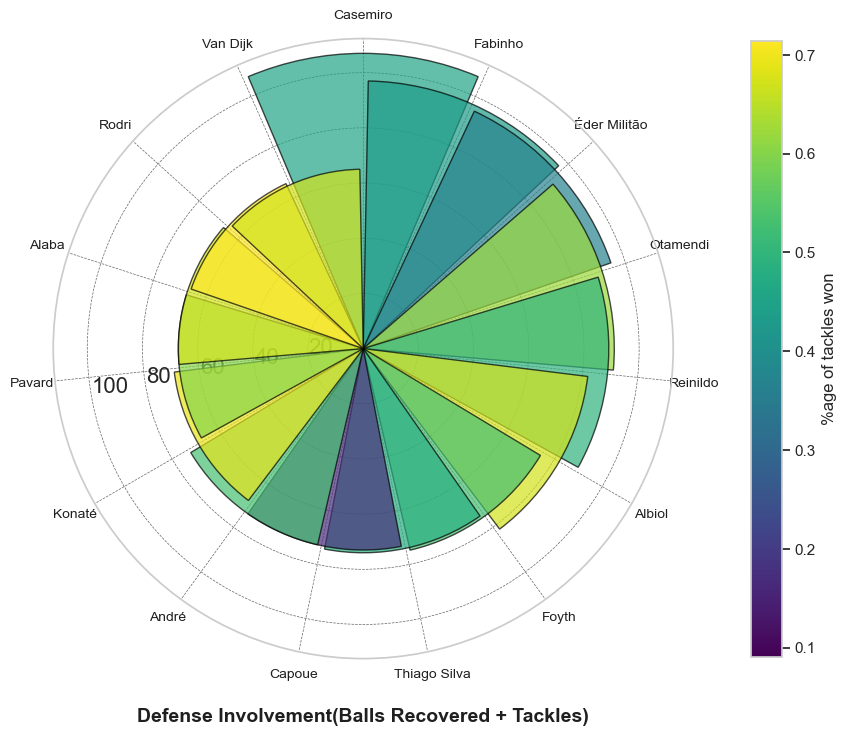

In [364]:
defending['t_won_per']=defending['t_won']/defending['tackles']
defending['filter_data']=defending['balls_recoverd']+defending['tackles']
top_defenders = defending.nlargest(15,'filter_data')
# Set up the plot
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
ax.set_theta_direction(-1)
ax.set_theta_offset(np.pi / 2.0)
ax.set_rlabel_position(-100)

# Plot the radar chart with improved colors
theta = np.linspace(0, 2 * np.pi, len(top_defenders), endpoint=False)
bars = ax.bar(theta, top_defenders['filter_data'], color=plt.cm.viridis(top_defenders['t_won_per'] / top_defenders['t_won_per'].max()), edgecolor='black', alpha=0.7)

# Create a color map for the legend
sm = ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=top_defenders['t_won_per'].min(), vmax=top_defenders['t_won_per'].max()))
sm.set_array([])

# Add color bar for the legend
cbar = plt.colorbar(sm, pad=0.1, fraction=0.1, shrink=0.8, orientation='vertical')
cbar.set_label('%age of tackles won')

# Set labels for each player with adjusted size and color
ax.set_xticks(theta)
ax.set_xticklabels(top_defenders['player_name'], fontsize=10, color='#1F1F1F')


# Add grid lines
ax.grid(color='#666666', linestyle='--', linewidth=0.5)
ax.tick_params(axis='y', labelsize=16, pad=20,right=False)
# Add a big and bold label for goal involvement
ax.set_xlabel('Defense Involvement(Balls Recovered + Tackles)', labelpad=20, size=14, weight='bold', color='#1F1F1F')

# Adjust visibility and color of axis labels
for tick, label in zip(ax.yaxis.get_major_ticks(), top_defenders['filter_data']):
    tick.label2.set_visible(True)
    tick.label2.set_color('#1F1F1F')
    tick.label2.set_text(str(label))  # Display the goal involvement number

    
    

# Show the plot
plt.show()    

# Show the plot
plt.show()

In [298]:
top_defenders

,serial,player_name,club,position,balls_recoverd,tackles,t_won,t_lost,clearance_attempted,match_played,t_won_per,filter_data
0,1,Casemiro,Real Madrid,Midfielder,76,31,13,18,19,11,0.419355,107
3,4,Fabinho,Liverpool,Midfielder,74,23,9,14,8,13,0.391304,97
1,1,Éder Militão,Real Madrid,Defender,76,19,6,13,32,12,0.315789,95
6,7,Otamendi,Benfica,Defender,63,28,17,11,48,9,0.607143,91
2,1,Reinildo,Atlético,Defender,76,13,6,7,20,10,0.461538,89
4,5,Albiol,Villarreal,Defender,73,9,6,3,62,12,0.666667,82
10,11,Foyth,Villarreal,Defender,55,20,10,10,30,10,0.500000,75
5,6,Thiago Silva,Chelsea,Defender,65,9,4,5,17,9,0.444444,74
7,8,Capoue,Villarreal,Midfielder,62,11,1,10,29,12,0.090909,73
21,22,André,LOSC,Midfielder,49,24,12,12,11,7,0.500000,73


Here we see the 10 best penalty takers of the seaso 2021-22

From the entire analysis of attacking players we see that Lewandowski is one of the most complete attacking player but Benzema is the best Forward

Here is a List of players who have attempted the most amount of tackles during the entire season.
Just attempting tackles is not enough we need look at plyers who have won the most amount of tackles.

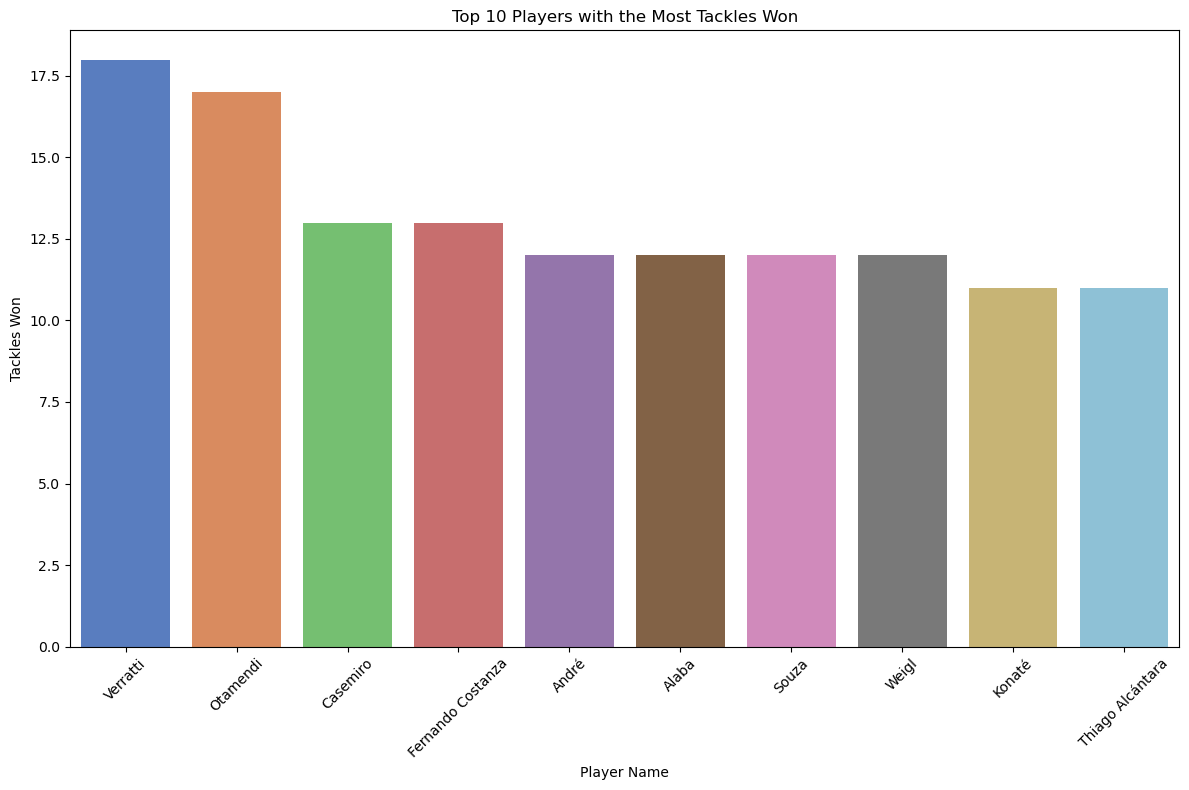

In [106]:
plt.figure(figsize=(12, 8))
top_10_tackles_won = defending.nlargest(10, 't_won')
barplot_top_tackles_won = sns.barplot(x='player_name', y='t_won', data=top_10_tackles_won, palette='muted')
barplot_top_tackles_won.set_title('Top 10 Players with the Most Tackles Won')
barplot_top_tackles_won.set_xlabel('Player Name')
barplot_top_tackles_won.set_ylabel('Tackles Won')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

We also need to compare just midfeilders and Defenders

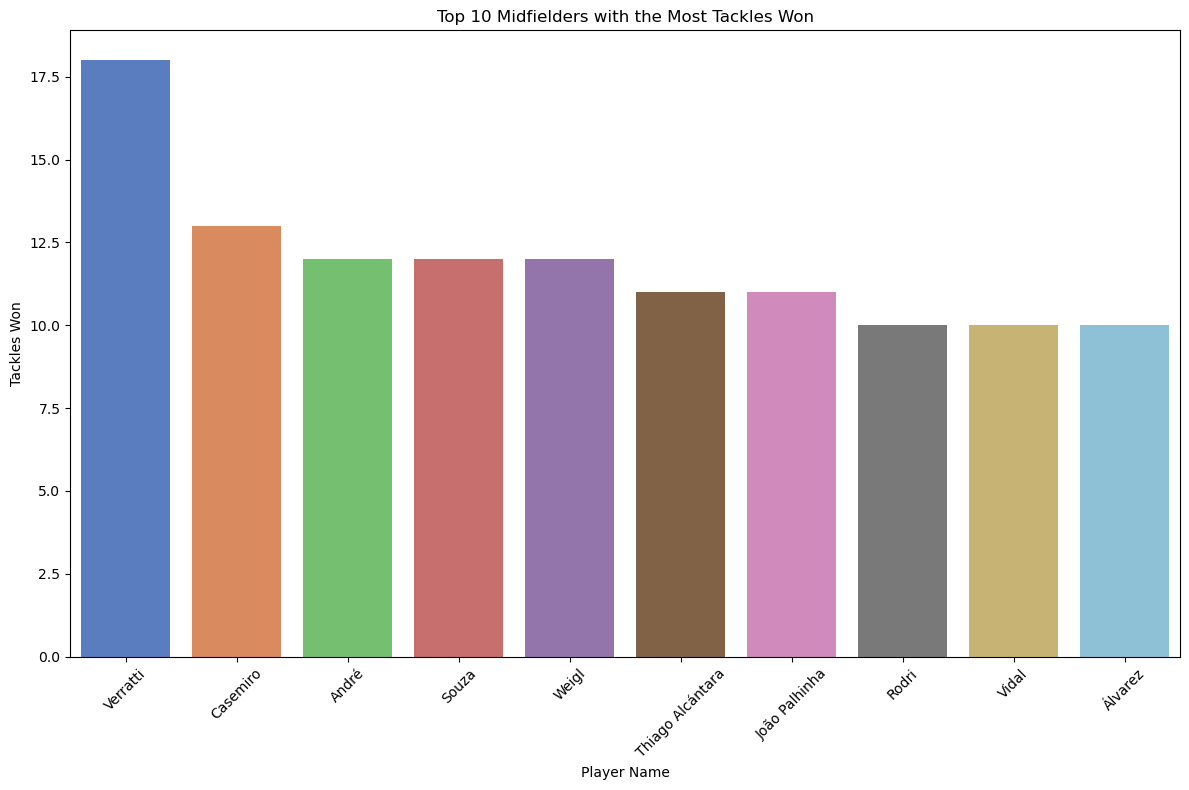

In [108]:
plt.figure(figsize=(12, 8))
top_10_midfield_tackles_won = defending[defending['position'] == 'Midfielder'].nlargest(10, 't_won')
barplot_top_midfield_tackles_won = sns.barplot(x='player_name', y='t_won', data=top_10_midfield_tackles_won, palette='muted')
barplot_top_midfield_tackles_won.set_title('Top 10 Midfielders with the Most Tackles Won')
barplot_top_midfield_tackles_won.set_xlabel('Player Name')
barplot_top_midfield_tackles_won.set_ylabel('Tackles Won')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

These are the best midfielders to have made the most amount of successfull tackels , but inorder to find the best defensive midfielders we also need to consider the the amount of balls recoverd by each of these players

In [110]:
midfielders_df = defending[defending['position'] == 'Midfielder']
top_10_midfielders_tackles_won = midfielders_df.nlargest(10, 't_won')
top_10_midfielders_tackles_won


,serial,player_name,club,position,balls_recoverd,tackles,t_won,t_lost,clearance_attempted,match_played
178,179,Verratti,Paris,Midfielder,22,35,18,17,4,5
0,1,Casemiro,Real Madrid,Midfielder,76,31,13,18,19,11
21,22,André,LOSC,Midfielder,49,24,12,12,11,7
48,49,Souza,Beşiktaş,Midfielder,40,20,12,8,9,5
75,76,Weigl,Benfica,Midfielder,35,23,12,11,12,9
49,49,Thiago Alcántara,Liverpool,Midfielder,40,16,11,5,5,10
69,70,João Palhinha,Sporting CP,Midfielder,36,29,11,18,6,6
14,15,Rodri,Man. City,Midfielder,52,14,10,4,5,10
109,110,Vidal,Inter,Midfielder,30,19,10,9,9,7
120,121,Álvarez,Ajax,Midfielder,29,19,10,9,7,7


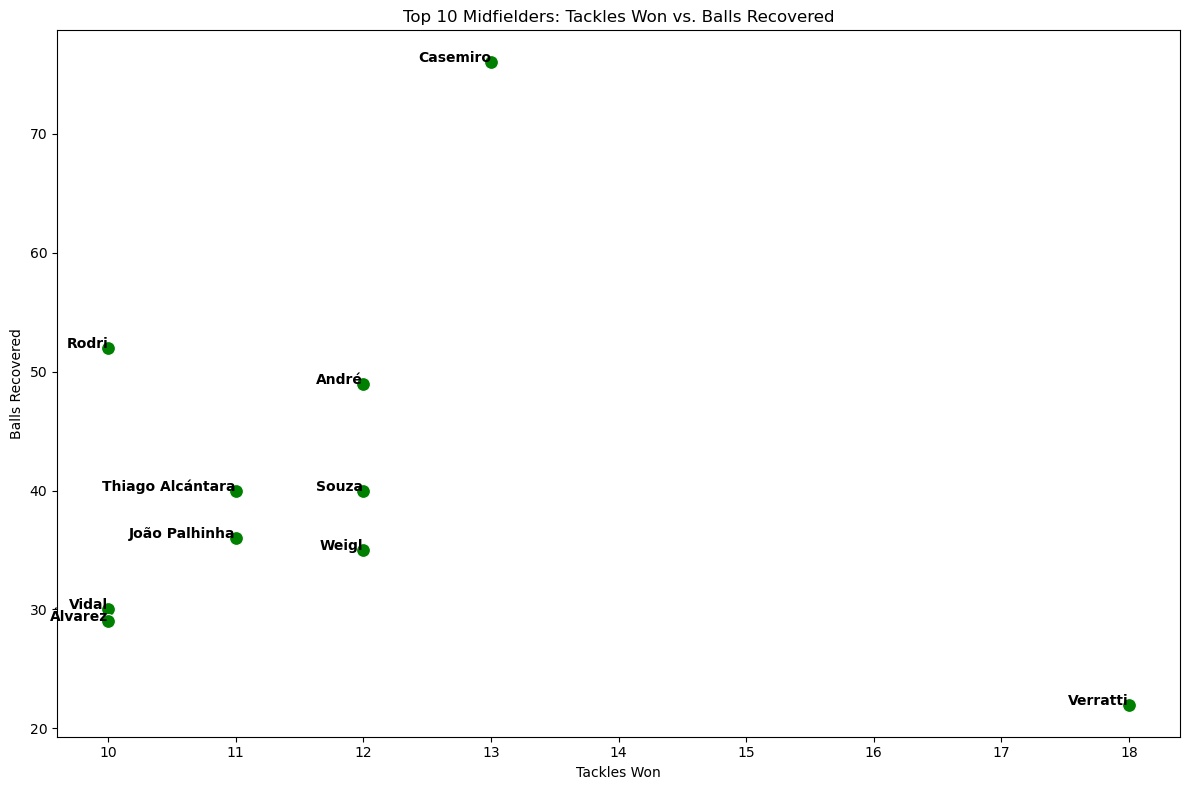

In [113]:
top_10_midfielders_tackles_won.reset_index(drop=True, inplace=True)
# Now let's try to add the player names to the markers again
plt.figure(figsize=(12, 8))
scatterplot_top_midfielders = sns.scatterplot(x='t_won', y='balls_recoverd', data=top_10_midfielders_tackles_won, s=100, color='g')
scatterplot_top_midfielders.set_title('Top 10 Midfielders: Tackles Won vs. Balls Recovered')
scatterplot_top_midfielders.set_xlabel('Tackles Won')
scatterplot_top_midfielders.set_ylabel('Balls Recovered')

# Add player names to the markers
for line in range(0,top_10_midfielders_tackles_won.shape[0]):
     scatterplot_top_midfielders.text(top_10_midfielders_tackles_won.t_won[line], top_10_midfielders_tackles_won.balls_recoverd[line], top_10_midfielders_tackles_won.player_name[line], horizontalalignment='right', size='medium', color='black', weight='semibold')

plt.tight_layout()
plt.show()

Hence here we see that eventhough Veratti has won the most amount of tackles Casemiro is the better defensive midfielder as he has recovered the most balls in the season while also winining 13 tackles

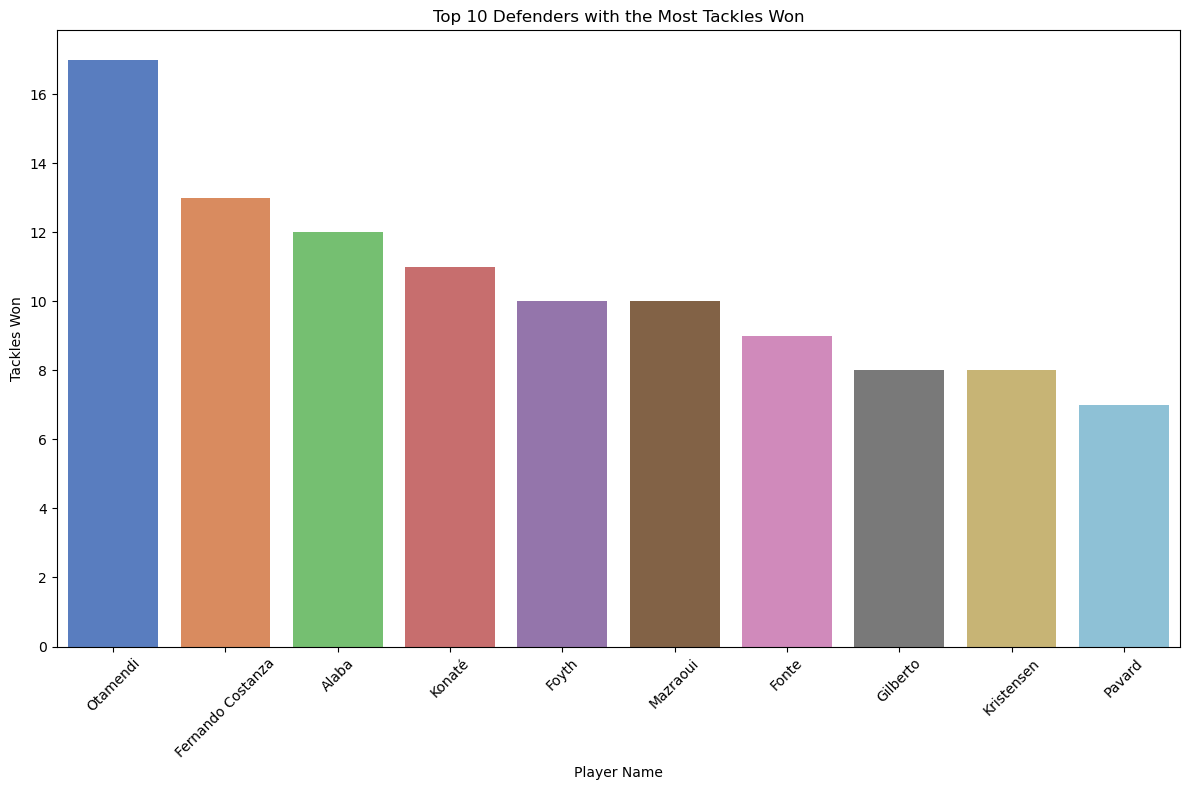

In [114]:
plt.figure(figsize=(12, 8))
top_10_midfield_tackles_won = defending[defending['position'] == 'Defender'].nlargest(10, 't_won')
barplot_top_midfield_tackles_won = sns.barplot(x='player_name', y='t_won', data=top_10_midfield_tackles_won, palette='muted')
barplot_top_midfield_tackles_won.set_title('Top 10 Defenders with the Most Tackles Won')
barplot_top_midfield_tackles_won.set_xlabel('Player Name')
barplot_top_midfield_tackles_won.set_ylabel('Tackles Won')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Here is a list of the defenders who have won the most amount of tackles.

In [115]:
defenders_df = defending[defending['position'] == 'Defender']
top_10_defenders_tackles_won = defenders_df.nlargest(10, 't_won')
top_10_defenders_tackles_won


,serial,player_name,club,position,balls_recoverd,tackles,t_won,t_lost,clearance_attempted,match_played
6,7,Otamendi,Benfica,Defender,63,28,17,11,48,9
53,54,Fernando Costanza,Sheriff,Defender,39,19,13,6,39,6
22,22,Alaba,Real Madrid,Defender,49,18,12,6,28,12
12,13,Konaté,Liverpool,Defender,53,16,11,5,17,8
10,11,Foyth,Villarreal,Defender,55,20,10,10,30,10
50,49,Mazraoui,Ajax,Defender,40,16,10,6,9,8
29,30,Fonte,LOSC,Defender,47,13,9,4,29,8
26,27,Gilberto,Benfica,Defender,48,17,8,9,17,9
70,70,Kristensen,Salzburg,Defender,36,18,8,10,27,8
11,11,Pavard,Bayern,Defender,55,12,7,5,17,10


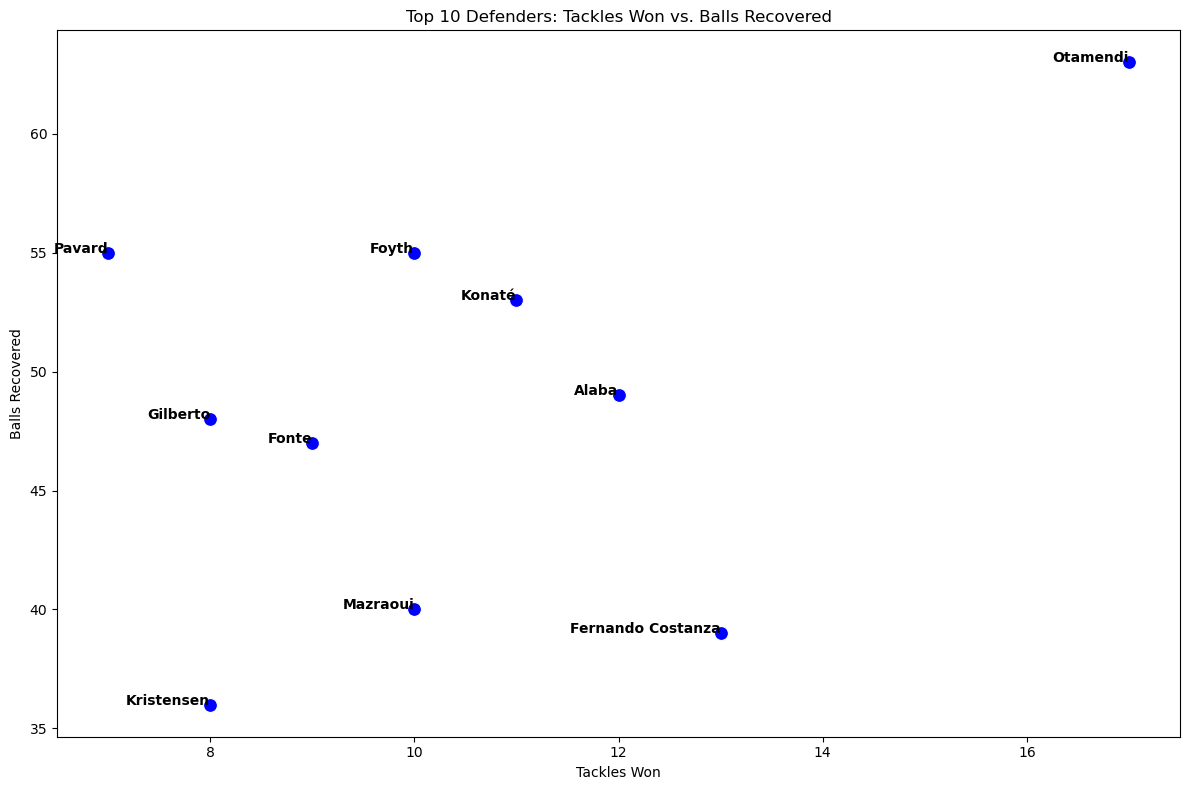

In [119]:
top_10_defenders_tackles_won.reset_index(drop=True, inplace=True)

plt.figure(figsize=(12, 8))
scatterplot_top_defenders = sns.scatterplot(x='t_won', y='balls_recoverd', data=top_10_defenders_tackles_won, s=100, color='b')
scatterplot_top_defenders.set_title('Top 10 Defenders: Tackles Won vs. Balls Recovered')
scatterplot_top_defenders.set_xlabel('Tackles Won')
scatterplot_top_defenders.set_ylabel('Balls Recovered')

# Add player names to the markers
for line in range(0,top_10_defenders_tackles_won.shape[0]):
     scatterplot_top_defenders.text(top_10_defenders_tackles_won.t_won[line], top_10_defenders_tackles_won.balls_recoverd[line], top_10_defenders_tackles_won.player_name[line], horizontalalignment='right', size='medium', color='black', weight='semibold')

plt.tight_layout()
plt.show()

Here We can see that Otamendi was by far the best defender of the entire season

Now every team requires hardworking players hence we will finally look at players who run the most . 

In [121]:
# Load the key_stats.csv to use it for analysis
key_stats_df = pd.read_csv('key_stats.csv')
# Display the head of the dataframe to ensure it's loaded correctly
print(key_stats_df.head())

       player_name         club    position  minutes_played  match_played  \
0         Courtois  Real Madrid  Goalkeeper            1230            13   
1  Vinícius Júnior  Real Madrid     Forward            1199            13   
2          Benzema  Real Madrid     Forward            1106            12   
3           Modrić  Real Madrid  Midfielder            1077            13   
4     Éder Militão  Real Madrid    Defender            1076            12   

   goals  assists distance_covered  
0      0        0             64.2  
1      4        6            133.0  
2     15        1            121.5  
3      0        4            124.5  
4      0        0            110.4  


In [123]:
keystats['distance_covered'] = pd.to_numeric(keystats['distance_covered'], errors='coerce')
key_stats_df.dropna(subset=['distance_covered'], inplace=True)

# Now let's try finding the top 10 players who covered the most distance again.
top_10_distance_covered = keystats.nlargest(10, 'distance_covered')
print(top_10_distance_covered)

        player_name         club    position  minutes_played  match_played  \
1   Vinícius Júnior  Real Madrid     Forward            1199            13   
55           Parejo   Villarreal  Midfielder            1055            12   
56           Capoue   Villarreal  Midfielder            1046            12   
3            Modrić  Real Madrid  Midfielder            1077            13   
53       Pau Torres   Villarreal    Defender            1080            12   
2           Benzema  Real Madrid     Forward            1106            12   
65   Bernardo Silva    Man. City  Midfielder             878            11   
59           Mahrez    Man. City  Midfielder             986            12   
8             Kroos  Real Madrid  Midfielder             902            12   
57           Albiol   Villarreal    Defender            1045            12   

    goals  assists  distance_covered  
1       4        6             133.0  
55      1        3             130.9  
56      2        4      

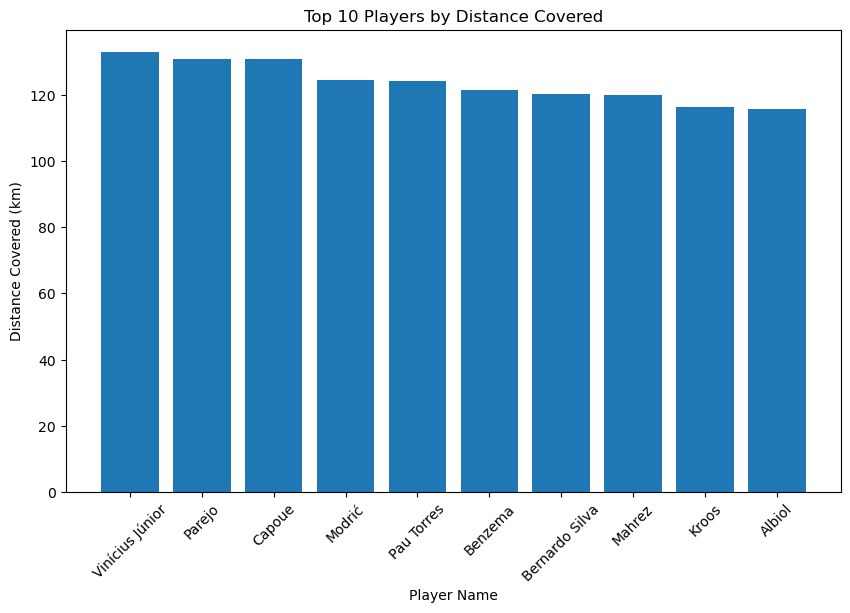

In [124]:
plt.figure(figsize=(10, 6))
plt.bar(top_10_distance_covered['player_name'], top_10_distance_covered['distance_covered'])
plt.title('Top 10 Players by Distance Covered')
plt.xlabel('Player Name')
plt.ylabel('Distance Covered (km)')
plt.xticks(rotation=45)
plt.show()

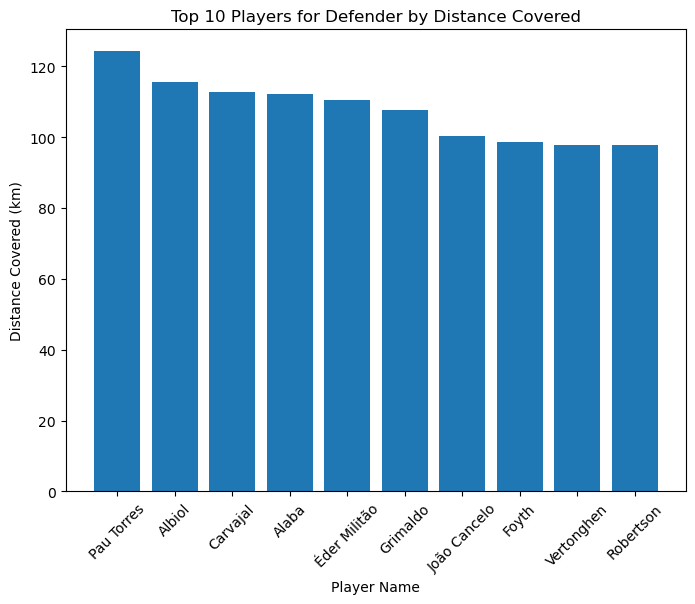

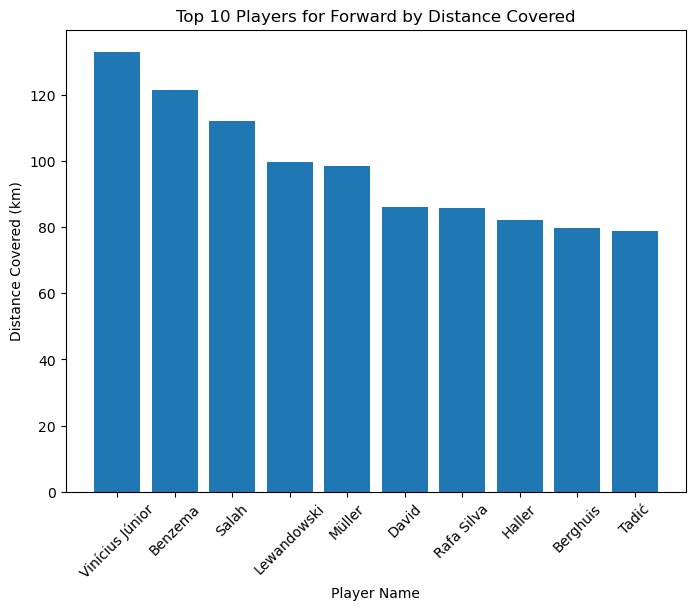

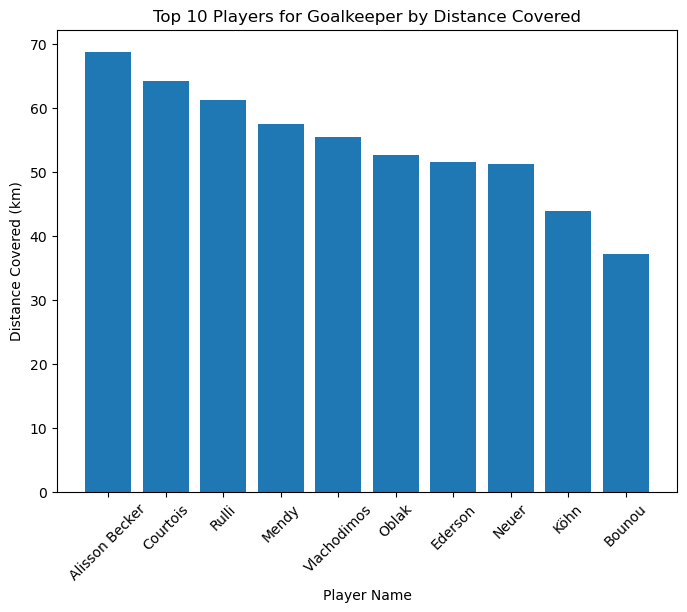

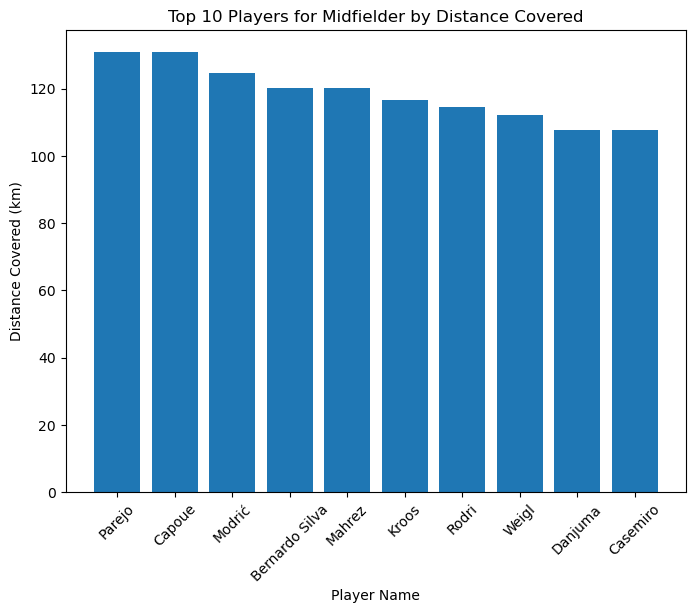

In [133]:
top_10_distance_by_position = keystats.groupby('position').apply(lambda x: x.nlargest(10, 'distance_covered')).reset_index(drop=True)
positions = top_10_distance_by_position['position'].unique()
for position in positions:
    data = top_10_distance_by_position[top_10_distance_by_position['position'] == position]
    plt.figure(figsize=(8, 6))
    plt.bar(data['player_name'], data['distance_covered'])
    plt.title(f'Top 10 Players for {position} by Distance Covered')
    plt.xlabel('Player Name')
    plt.ylabel('Distance Covered (km)')
    plt.xticks(rotation=45)
    plt.show()

Here we seee the most hardworking players at each position.

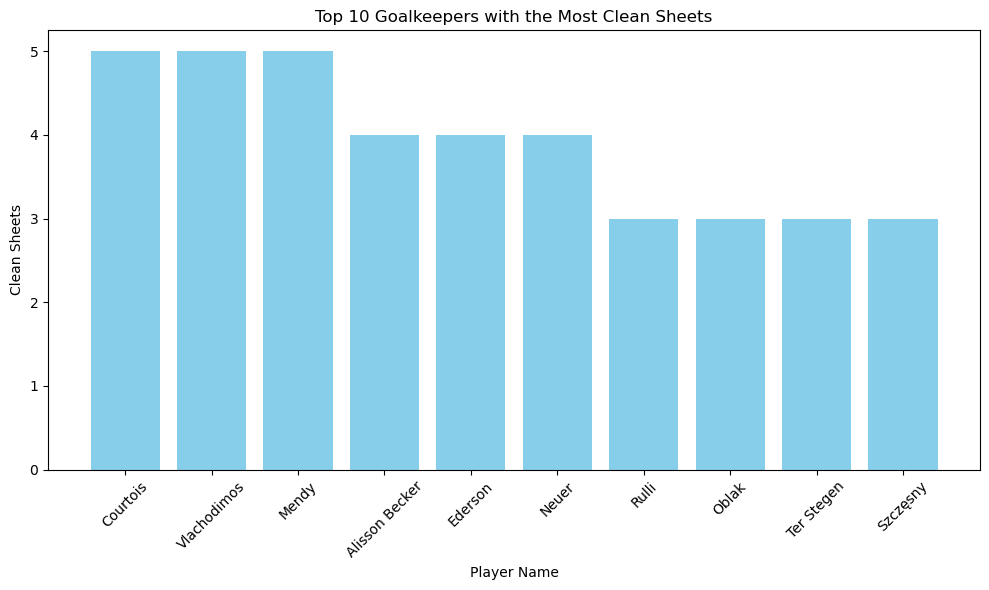

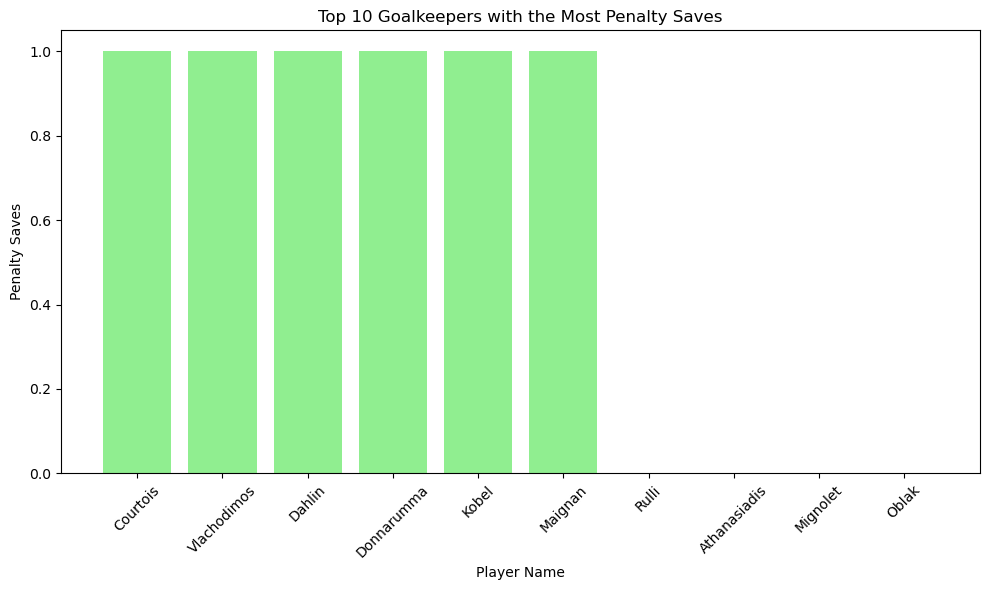

In [134]:
goalkeeping['cleansheets'] = pd.to_numeric(goalkeeping['cleansheets'], errors='coerce')
goalkeeping['saved_penalties'] = pd.to_numeric(goalkeeping['saved_penalties'], errors='coerce')

# Find the top 10 goalkeepers with the most clean sheets
top_10_clean_sheets = goalkeeping.nlargest(10, 'cleansheets')
# Find the top 10 goalkeepers with the most penalty saves
top_10_penalty_saved = goalkeeping.nlargest(10, 'saved_penalties')

# Plot for top 10 goalkeepers with the most clean sheets
plt.figure(figsize=(10, 6))
plt.bar(top_10_clean_sheets['player_name'], top_10_clean_sheets['cleansheets'], color='skyblue')
plt.title('Top 10 Goalkeepers with the Most Clean Sheets')
plt.xlabel('Player Name')
plt.ylabel('Clean Sheets')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot for top 10 goalkeepers with the most penalty saves
plt.figure(figsize=(10, 6))
plt.bar(top_10_penalty_saved['player_name'], top_10_penalty_saved['saved_penalties'], color='lightgreen')
plt.title('Top 10 Goalkeepers with the Most Penalty Saves')
plt.xlabel('Player Name')
plt.ylabel('Penalty Saves')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Here we see the best Goalkeepers of the Entire season based on their cleansheets , we can also see that no goalkeeper managed to save more than one penalty the entire season.

In [136]:
top_10_saves = goalkeeping.nlargest(10, 'saved')
top_10_saves

,serial,player_name,club,position,saved,conceded,saved_penalties,cleansheets,punches made,match_played
0,1,Courtois,Real Madrid,Goalkeeper,61,14,1,5,4,13
1,2,Rulli,Villarreal,Goalkeeper,41,16,0,3,12,12
2,3,Vlachodimos,Benfica,Goalkeeper,38,17,1,5,5,10
3,4,Athanasiadis,Sheriff,Goalkeeper,29,8,0,1,2,5
4,5,Mignolet,Club Brugge,Goalkeeper,28,20,0,0,1,6
5,6,Oblak,Atlético,Goalkeeper,26,10,0,3,2,10
6,7,Musso,Atalanta,Goalkeeper,21,13,0,1,1,6
7,8,Ersin Destanoğlu,Beşiktaş,Goalkeeper,20,17,0,0,0,5
8,9,De Gea,Man. United,Goalkeeper,19,9,0,1,0,7
9,9,Dahlin,Malmö,Goalkeeper,19,8,1,0,3,4


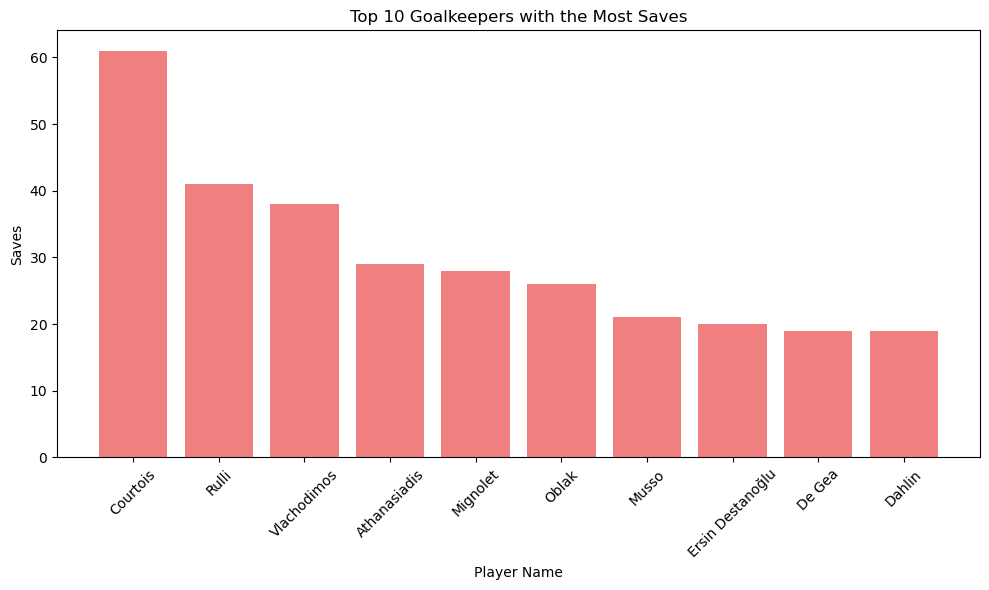

In [137]:
plt.figure(figsize=(10, 6))
plt.bar(top_10_saves['player_name'], top_10_saves['saved'], color='lightcoral')
plt.title('Top 10 Goalkeepers with the Most Saves')
plt.xlabel('Player Name')
plt.ylabel('Saves')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Hence it is Quite evident that Courtois has been the best GoalKeeper the entire season.

Now we look towards the analysis of the way team plays.

In [138]:
top_10_clubs_goals = goals.groupby('club')['goals'].sum().nlargest(10)
top_10_clubs_goals

club
Liverpool      37
Inter          35
Bayern         30
Man. City      28
Real Madrid    28
Ajax           21
Chelsea        21
Villarreal     20
Leipzig        15
Paris          15
Name: goals, dtype: int64

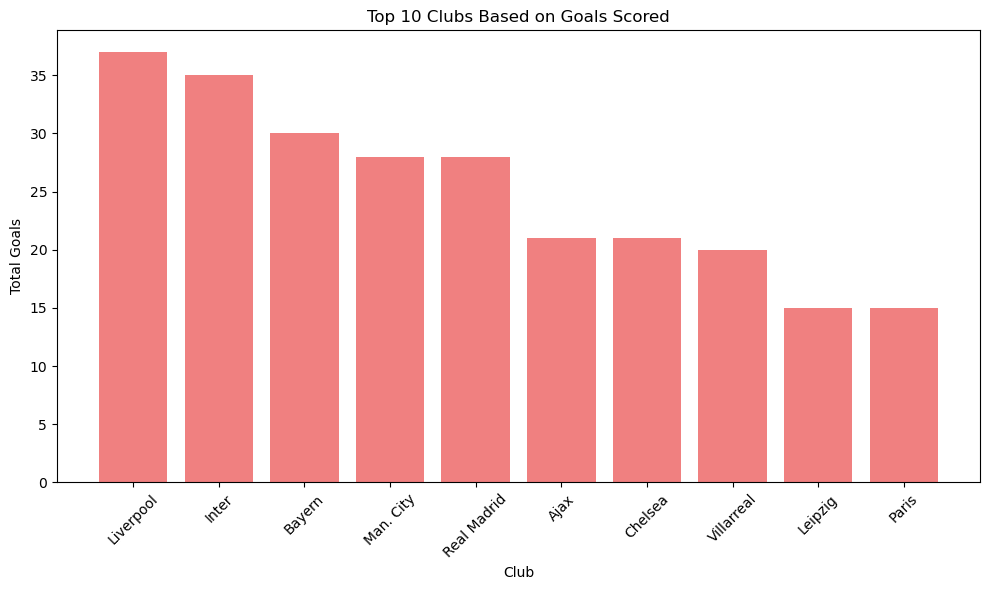

In [139]:
# Convert the Series to DataFrame for plotting

top_10_clubs_goals_df = top_10_clubs_goals.reset_index()

# Plot for top 10 clubs based on goals scored
plt.figure(figsize=(10, 6))
plt.bar(top_10_clubs_goals_df['club'], top_10_clubs_goals_df['goals'], color='lightcoral')
plt.title('Top 10 Clubs Based on Goals Scored')
plt.xlabel('Club')
plt.ylabel('Total Goals')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

From this plot we see all the teams that focused on playing attacking Football  with Liverpool and Inter at the peak of it

In [141]:
top_10_clubs_clean_sheets = goalkeeping.groupby('club')['cleansheets'].sum().nlargest(10)
top_10_clubs_clean_sheets

club
Benfica        5
Chelsea        5
Man. City      5
Real Madrid    5
Bayern         4
Juventus       4
Liverpool      4
Atlético       3
Barcelona      3
Inter          3
Name: cleansheets, dtype: int64

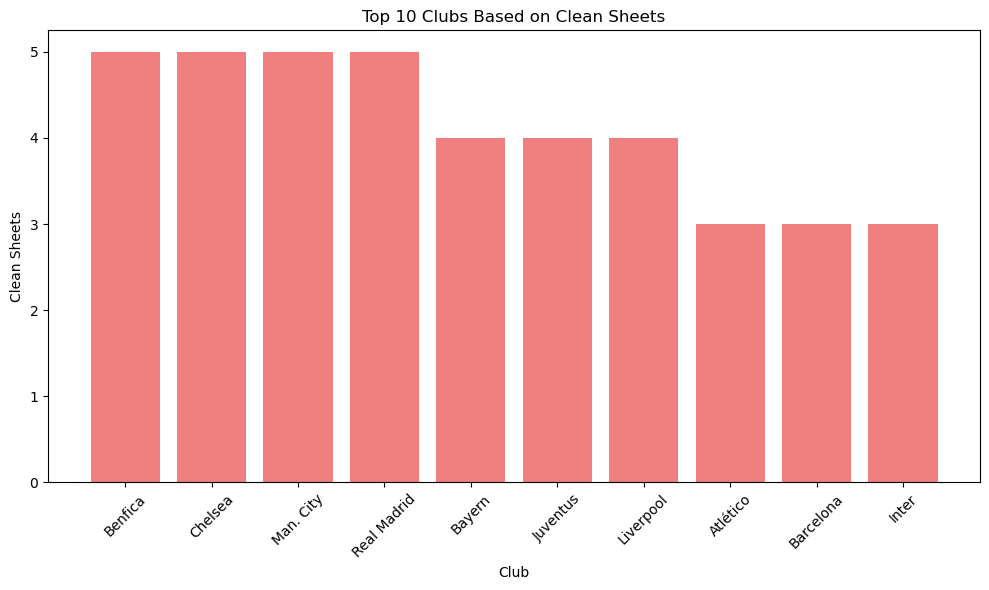

In [142]:
top_10_clubs_clean_sheets_df = top_10_clubs_clean_sheets.reset_index()

# Plot for top 10 clubs based on clean sheets
plt.figure(figsize=(10, 6))
plt.bar(top_10_clubs_clean_sheets_df['club'], top_10_clubs_clean_sheets_df['cleansheets'], color='lightcoral')
plt.title('Top 10 Clubs Based on Clean Sheets')
plt.xlabel('Club')
plt.ylabel('Clean Sheets')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Hence we see that four clubs had the best defence during this season , from the above two plots we can figure out that Man City, Liverpool and Real Madrid were the best teams that season as the scored more goals while conceding the least.

Now we look at teams which play with the ball most 

In [143]:
distribution

,serial,player_name,club,position,pass_accuracy,pass_attempted,pass_completed,cross_accuracy,cross_attempted,cross_complted,freekicks_taken,match_played
0,1,Erokhin,Zenit,Midfielder,98.0,27,26,0,2,0,0,6
1,2,Eric García,Barcelona,Defender,97.5,203,197,0,0,0,1,4
2,3,Ulreich,Bayern,Goalkeeper,97.0,32,31,0,0,0,1,1
3,4,Rugani,Juventus,Defender,96.8,130,122,0,0,0,0,4
4,5,J. Timber,Ajax,Midfielder,95.8,497,474,0,1,0,14,8
...,...,...,...,...,...,...,...,...,...,...,...,...
603,604,Phillips,Liverpool,Defender,44.5,37,33,0,0,0,1,2
604,605,Philipp,Wolfsburg,Forward,44.0,9,7,0,0,0,1,2
605,606,Brobbey,Leipzig,Forward,42.6,23,13,0,2,0,0,5
606,607,Traoré,Shakhtar Donetsk,Forward,36.5,22,16,0,0,0,0,2


In [144]:
top_10_clubs_passes_completed = distribution.groupby('club')['pass_completed'].sum().nlargest(10)
top_10_clubs_passes_completed

club
Liverpool      7103
Man. City      6781
Real Madrid    6513
Chelsea        5694
Bayern         5451
Paris          4137
Ajax           3941
Villarreal     3909
Juventus       3616
Man. United    3453
Name: pass_completed, dtype: int64

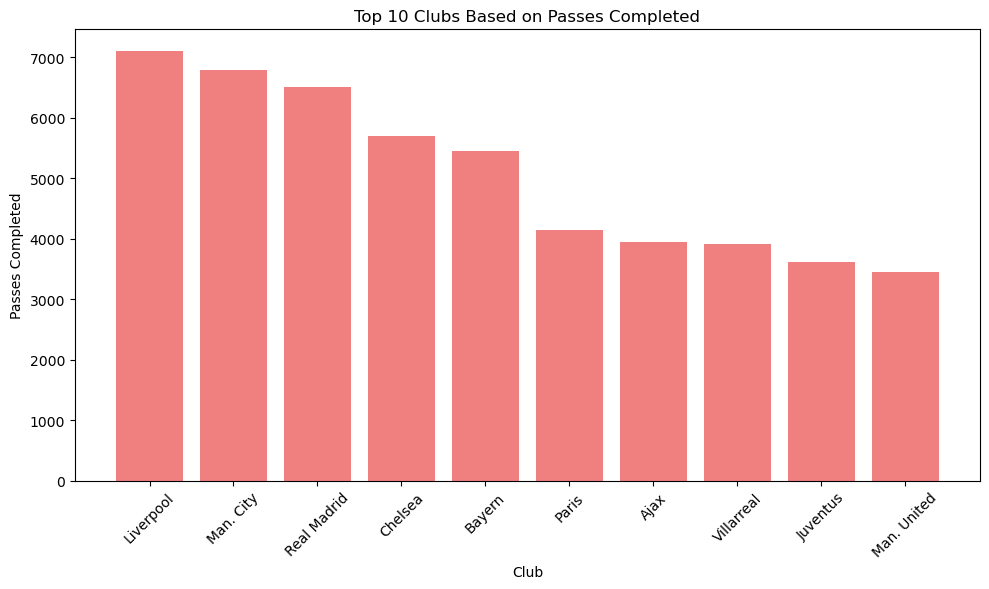

In [145]:

top_10_clubs_passes_completed_df = top_10_clubs_passes_completed.reset_index()

# Plot for top 10 clubs based on passes completed
plt.figure(figsize=(10, 6))
plt.bar(top_10_clubs_passes_completed_df['club'], top_10_clubs_passes_completed_df['pass_completed'], color='lightcoral')
plt.title('Top 10 Clubs Based on Passes Completed')
plt.xlabel('Club')
plt.ylabel('Passes Completed')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

From this plot we can see all the teams that primarly play possession based football with Liverpool , Man City and Real Madrid at the apex of this stratergy.

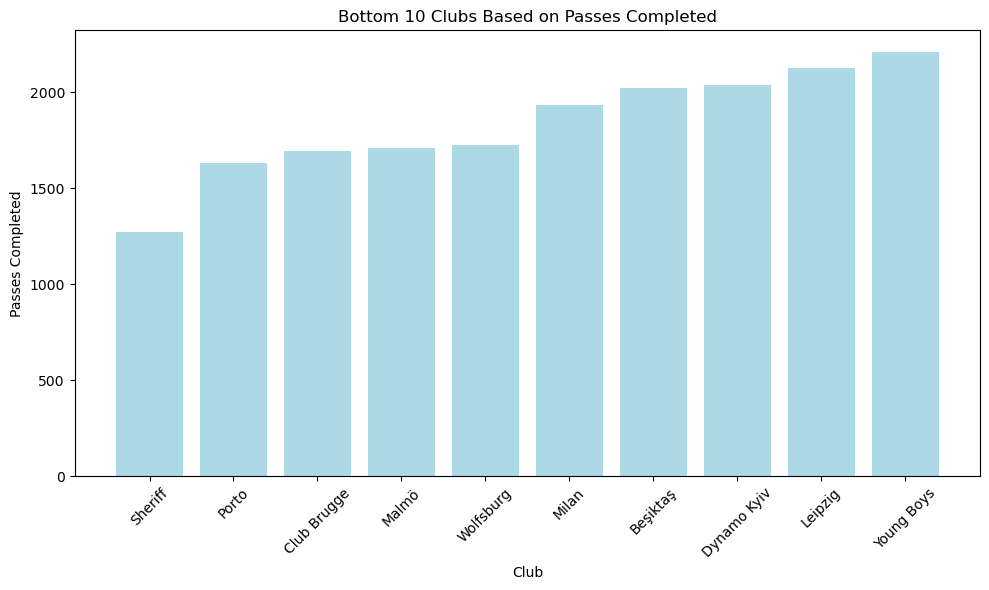

In [146]:
bottom_10_clubs_passes_completed = distribution.groupby('club')['pass_completed'].sum().nsmallest(10)

# Convert the Series to DataFrame for plotting
bottom_10_clubs_passes_completed_df = bottom_10_clubs_passes_completed.reset_index()

# Plot for bottom 10 clubs based on passes completed
plt.figure(figsize=(10, 6))
plt.bar(bottom_10_clubs_passes_completed_df['club'], bottom_10_clubs_passes_completed_df['pass_completed'], color='lightblue')
plt.title('Bottom 10 Clubs Based on Passes Completed')
plt.xlabel('Club')
plt.ylabel('Passes Completed')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

From both of these plots it is quite evident that the teams playing more possession based football were the more successfull one as the managed to score more goals while conceding the least ,in turn winning more matches.

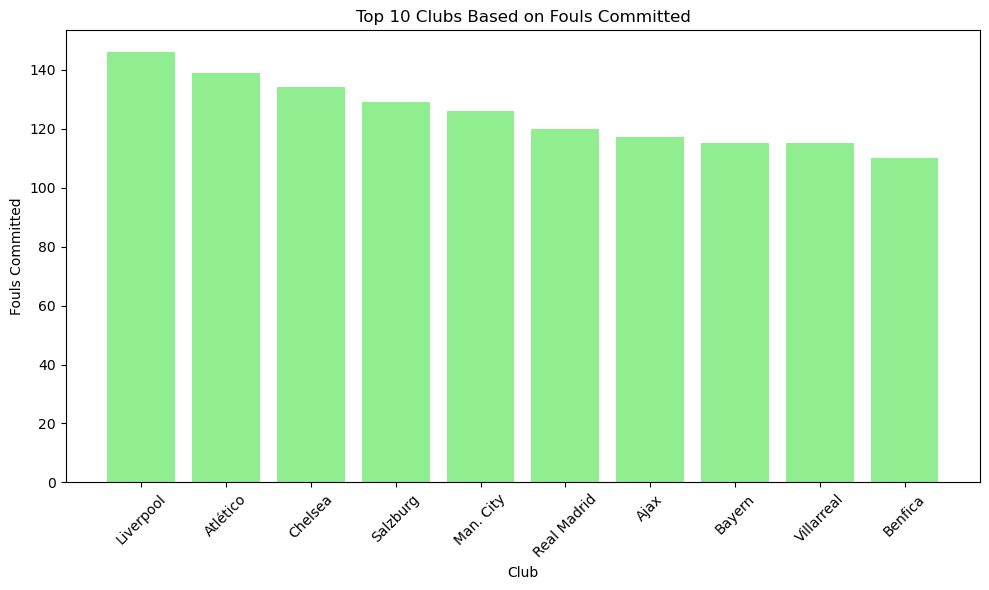

In [149]:
most_fouls_clubs = disciplne.groupby('club')['fouls_committed'].sum().nlargest(10)
most_fouls_clubs_df = most_fouls_clubs.reset_index()

# Plot for top 10 clubs based on fouls committed
plt.figure(figsize=(10, 6))
plt.bar(most_fouls_clubs_df['club'], most_fouls_clubs_df['fouls_committed'], color='lightgreen')
plt.title('Top 10 Clubs Based on Fouls Committed')
plt.xlabel('Club')
plt.ylabel('Fouls Committed')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

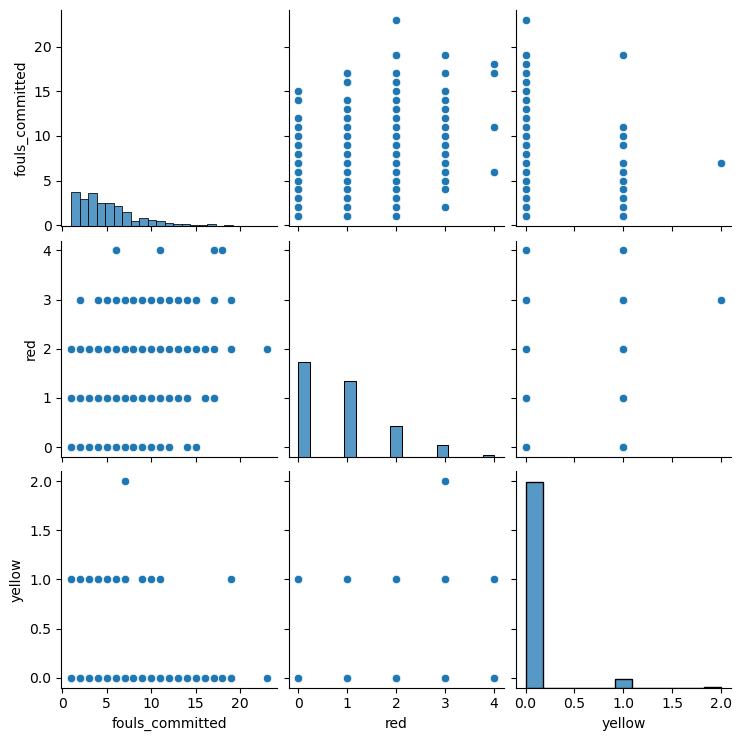

In [150]:
pairplot_data = disciplne[['fouls_committed', 'red', 'yellow']]
sns.pairplot(pairplot_data)